In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#importing PCA and TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from factor_analyzer import FactorAnalyzer

#importing clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage

#Silhouette score
from sklearn.metrics import silhouette_score

### Clustering

#### Problem Definition

The dataset provides detailed insights into the performance and characteristics of various advertisements, including metrics like impressions, clicks, spend, and revenue. It covers diverse aspects such as ad dimensions, types, platforms, and devices, making it valuable for analyzing and optimizing advertising strategies.

The dataset contains information on advertisements with the following 19   variables:

Timestamp: The timestamp of the advertisement.
InventoryType: Categorical variable indicating the type of inventory (format 1 to 7).
Ad-Length: Length dimension of the advertisement.
Ad-Width: Width dimension of the advertisement.
Ad-Size: Overall size of the advertisement (Length * Width).
Ad-Type: Categorical variable indicating the type of advertisement.
Platform: Categorical variable indicating the platform (Web, Video, or App).
Device-Type: Categorical variable indicating the type of device supporting the advertisement.
Available_Impressions: Frequency of the advertisement being shown
Matched_Queries: Search queries leading to clicks for the advertisement.
Impressions: Count of impressions out of total available impressions.
Clicks: Number of clicks on the advertisement.
Spend: Amount spent on specific ad variations.
Fee: Percentage of advertising fees payable.
Revenue: Income earned from the advertisement.
CTR (Click Through Rate): Percentage of clicks relative to total ad impressions.
CPM (Cost Per Mille): Cost per 1000 impressions.
CPC (Cost-Per-Click): Cost per click.

In [206]:
data_ad = pd.read_excel(r"C:\Users\Nitheesh\Downloads\Clustering+Clean+Ads_Data.xlsx")
data_ad.head()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-10       Format1          300        250    75000  Inter227   
2  2020-9-1-22       Format1          300        250    75000  Inter222   
3  2020-9-3-20       Format1          300        250    75000  Inter228   
4  2020-9-4-15       Format1          300        250    75000  Inter217   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0    Video     Desktop  Display                   1806              325   
1      App      Mobile    Video                   1780              285   
2    Video     Desktop  Display                   2727              356   
3    Video      Mobile    Video                   2430              497   
4      Web     Desktop    Video                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue     CTR  CPM  CPC  
0          323       1    0.0  0.35      0.0  0.0031  0.0  0.0  
1          285       1    0.0  0.35      0.0  0.0035  0.0  0.0  
2          355       1    0.0  0.35      0.0  0.0028  0.0  0.0  
3          495       1    0.0  0.35      0.0  0.0020  0.0  0.0  
4          242       1    0.0  0.35      0.0  0.0041  0.0  0.0

In [207]:
data_ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

Dataset: 23,066 entries, 19 columns, 3.3 MB memory usage
Data Types: Object (6), Integer (7), Float (6)
Non-Null Counts: Complete data for all columns
Missing Values: CTR, CPM, CPC columns have some missing values
Numeric Columns: Capture metrics like ad dimensions, impressions, matched_Queries, clicks, spend, fee, revenue, CTR, CPM, and CPC
Categorical Columns: Include timestamp, inventory type, ad type, platform, device type, and format.

The dataset comprises 23,066 entries and 19 columns. It includes a mix of object, integer, and float data types. Notably, all columns have complete data, except for CTR, CPM, and CPC, which exhibit some missing values. The numeric columns capture metrics like ad dimensions, impressions, clicks, spend, fee, revenue, CTR, CPM, and CPC. Meanwhile, categorical columns encompass aspects such as timestamp, inventory type, ad type, platform, device type, and format.b

In [208]:
data_ad[data_ad.duplicated()]

Empty DataFrame
Columns: [Timestamp, InventoryType, Ad - Length, Ad- Width, Ad Size, Ad Type, Platform, Device Type, Format, Available_Impressions, Matched_Queries, Impressions, Clicks, Spend, Fee, Revenue, CTR, CPM, CPC]
Index: []

There are no duplicate rows in the data.

In [209]:
data_ad.describe().T

count          mean           std         min  \
Ad - Length            23066.0  3.851631e+02  2.336514e+02    120.0000   
Ad- Width              23066.0  3.378960e+02  2.030929e+02     70.0000   
Ad Size                23066.0  9.667447e+04  6.153833e+04  33600.0000   
Available_Impressions  23066.0  2.432044e+06  4.742888e+06      1.0000   
Matched_Queries        23066.0  1.295099e+06  2.512970e+06      1.0000   
Impressions            23066.0  1.241520e+06  2.429400e+06      1.0000   
Clicks                 23066.0  1.067852e+04  1.735341e+04      1.0000   
Spend                  23066.0  2.706626e+03  4.067927e+03      0.0000   
Fee                    23066.0  3.351231e-01  3.196322e-02      0.2100   
Revenue                23066.0  1.924252e+03  3.105238e+03      0.0000   
CTR                    18330.0  7.366054e-02  7.515992e-02      0.0001   
CPM                    18330.0  7.672045e+00  6.481391e+00      0.0000   
CPC                    18330.0  3.510606e-01  3.433338e-01      0.0000   

                                25%           50%           75%          max  
Ad - Length              120.000000     300.00000  7.200000e+02       728.00  
Ad- Width                250.000000     300.00000  6.000000e+02       600.00  
Ad Size                72000.000000   72000.00000  8.400000e+04    216000.00  
Available_Impressions  33672.250000  483771.00000  2.527712e+06  27592861.00  
Matched_Queries        18282.500000  258087.50000  1.180700e+06  14702025.00  
Impressions             7990.500000  225290.00000  1.112428e+06  14194774.00  
Clicks                   710.000000    4425.00000  1.279375e+04    143049.00  
Spend                     85.180000    1425.12500  3.121400e+03     26931.87  
Fee                        0.330000       0.35000  3.500000e-01         0.35  
Revenue                   55.365375     926.33500  2.091338e+03     21276.18  
CTR                        0.002600       0.08255  1.300000e-01         1.00  
CPM                        1.710000       7.66000  1.251000e+01        81.56  
CPC                        0.090000       0.16000  5.700000e-01         7.26

In [230]:
df_num = data_ad.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

13

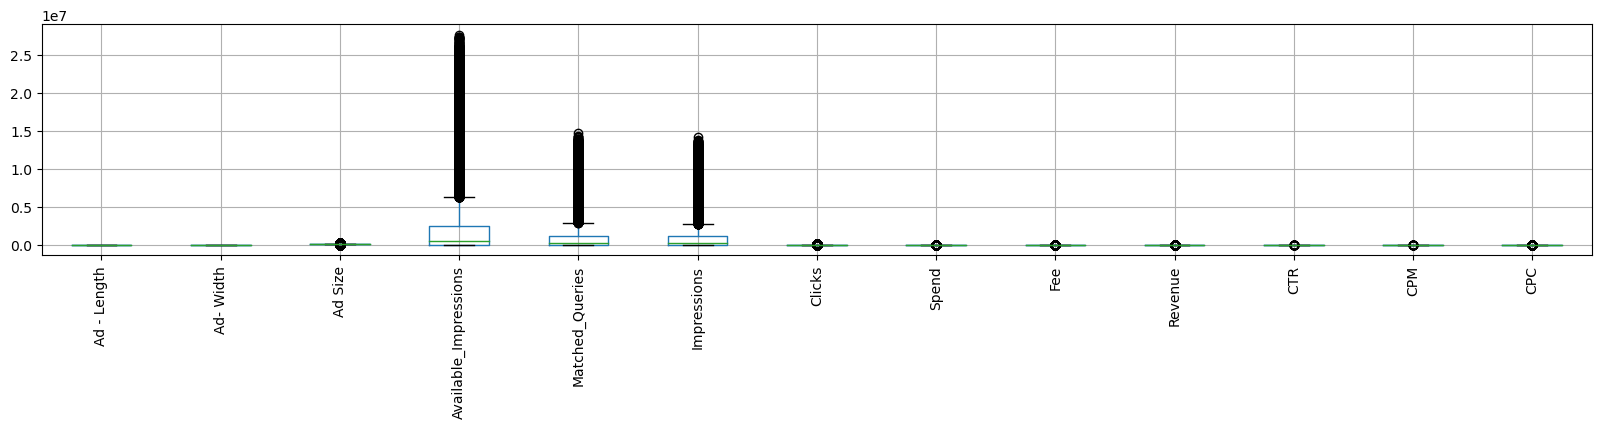

In [211]:
df_num.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

Ad - Length
Skew : 0.33


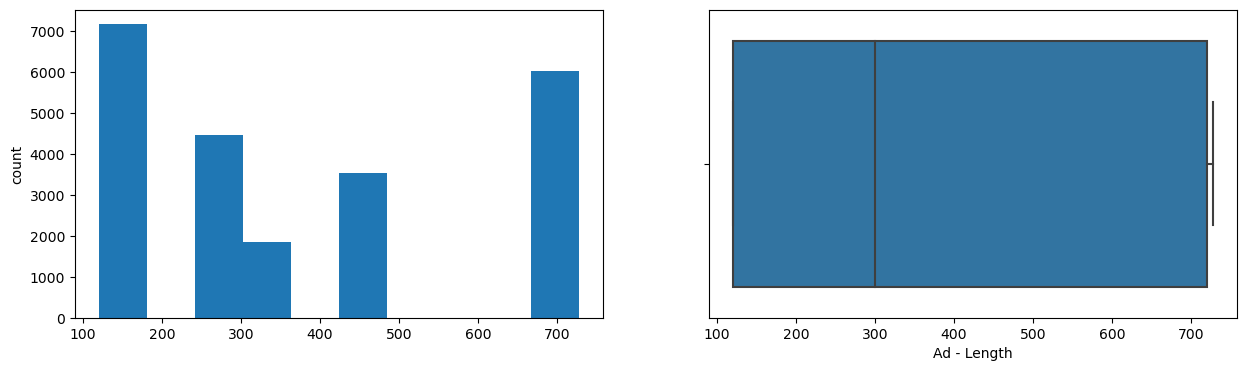

Ad- Width
Skew : 0.21


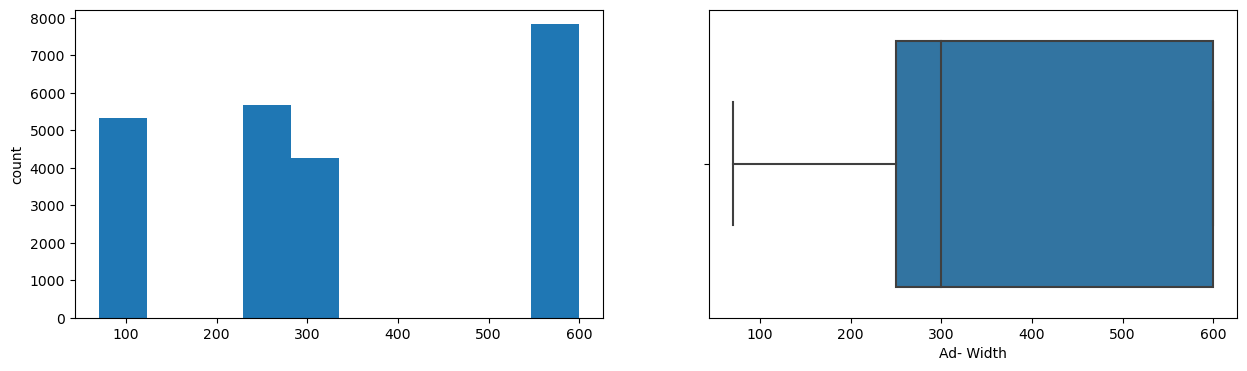

Ad Size
Skew : 1.21


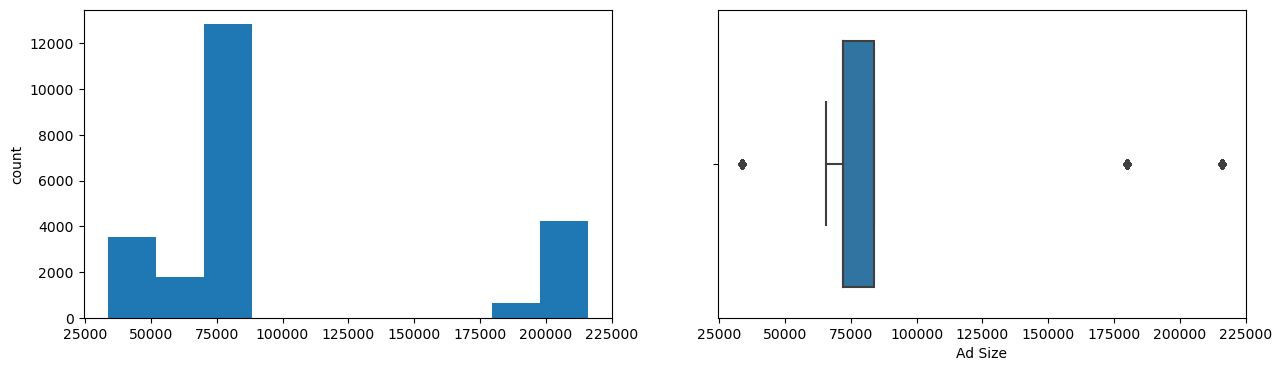

Available_Impressions
Skew : 3.07


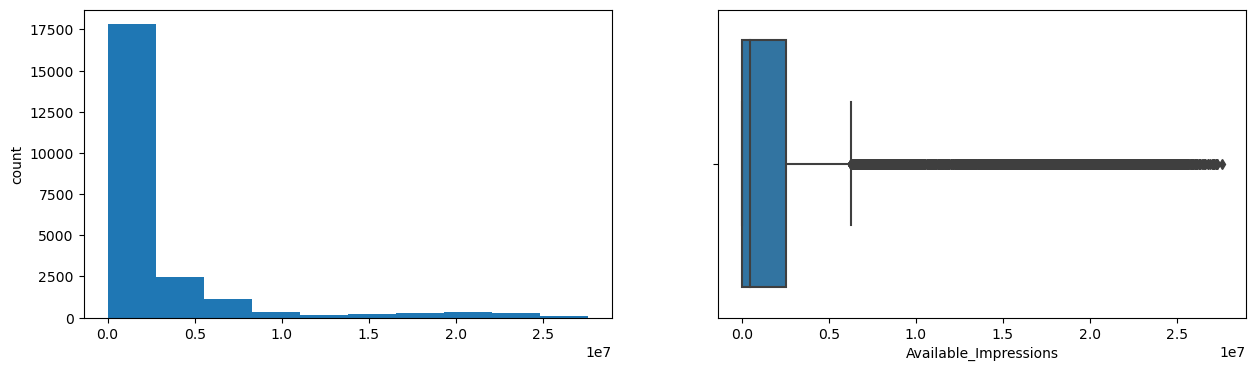

Matched_Queries
Skew : 2.98


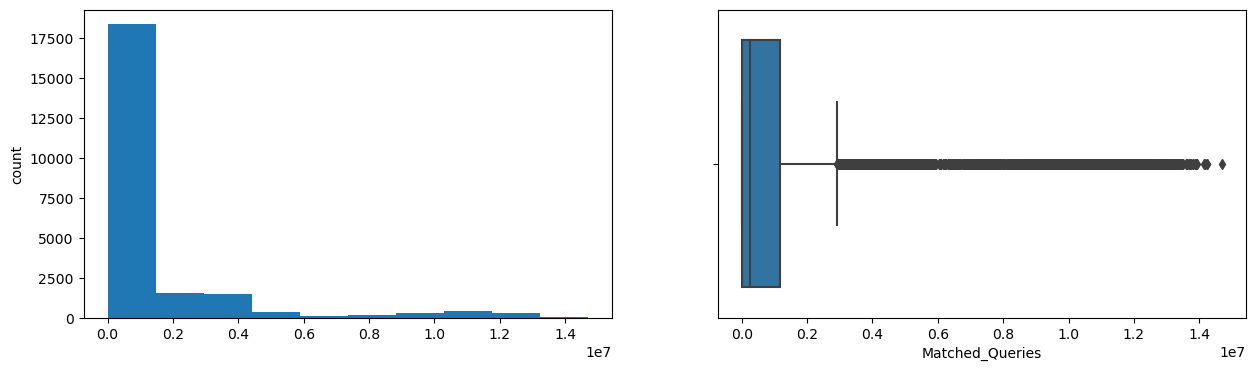

Impressions
Skew : 2.97


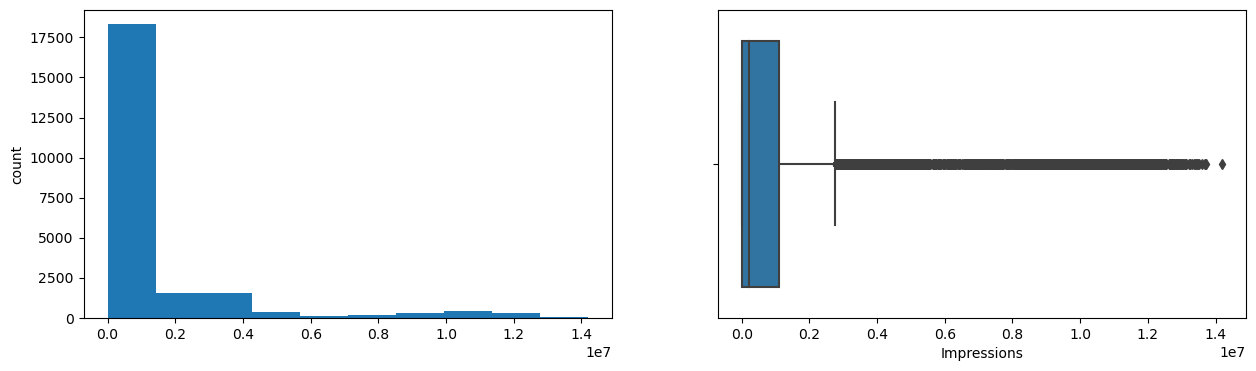

Clicks
Skew : 2.94


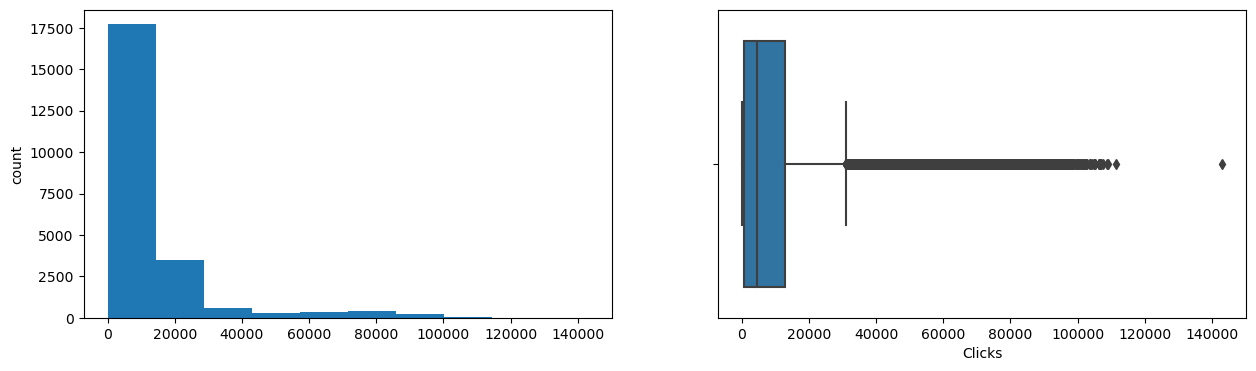

Spend
Skew : 2.58


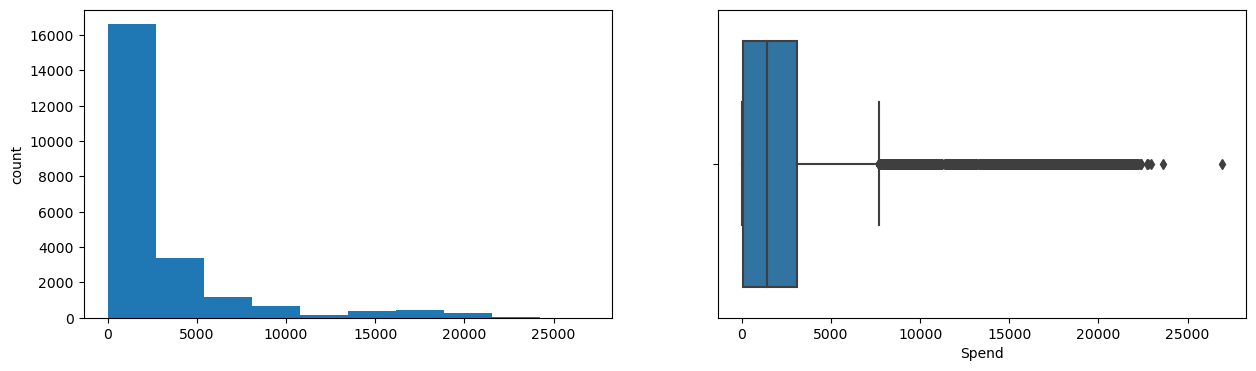

Fee
Skew : -2.3


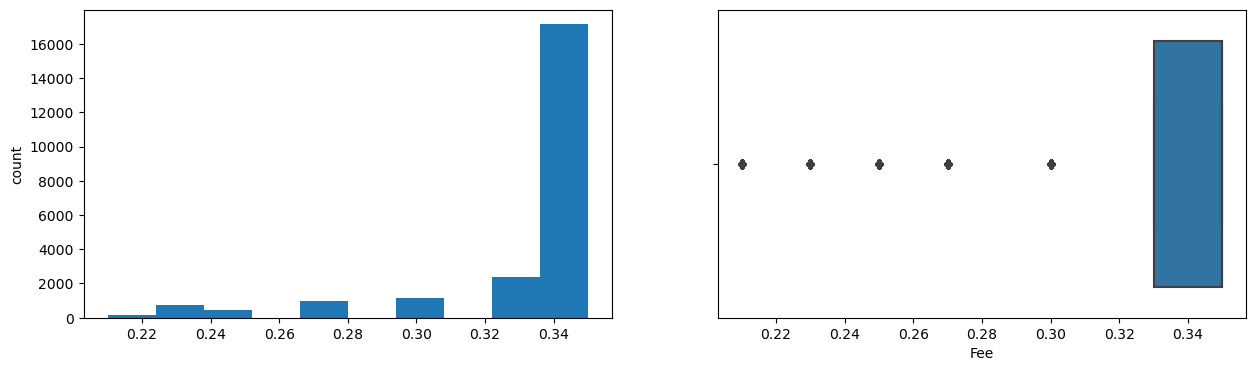

Revenue
Skew : 2.79


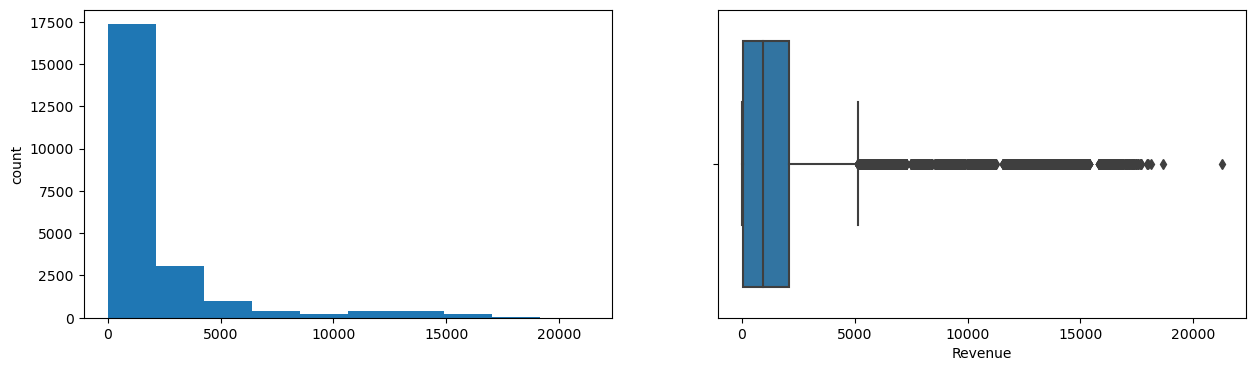

CTR
Skew : 0.75


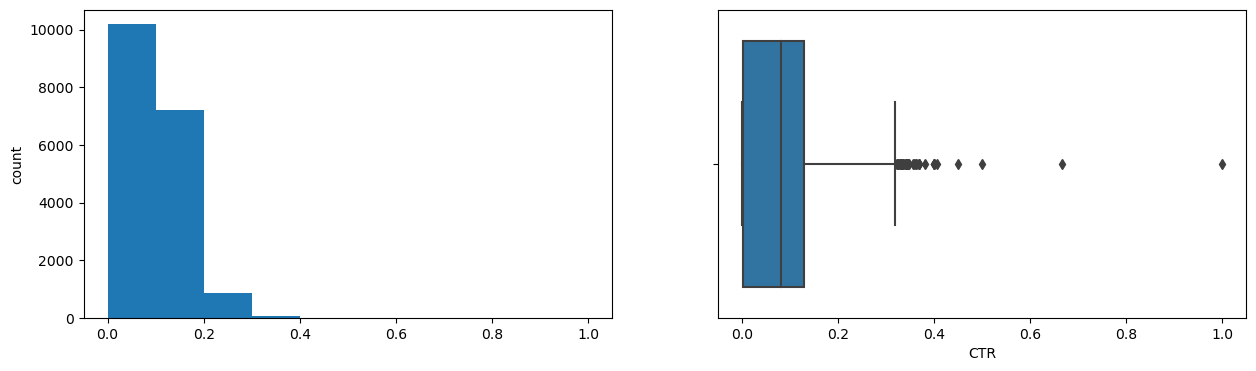

CPM
Skew : 0.75


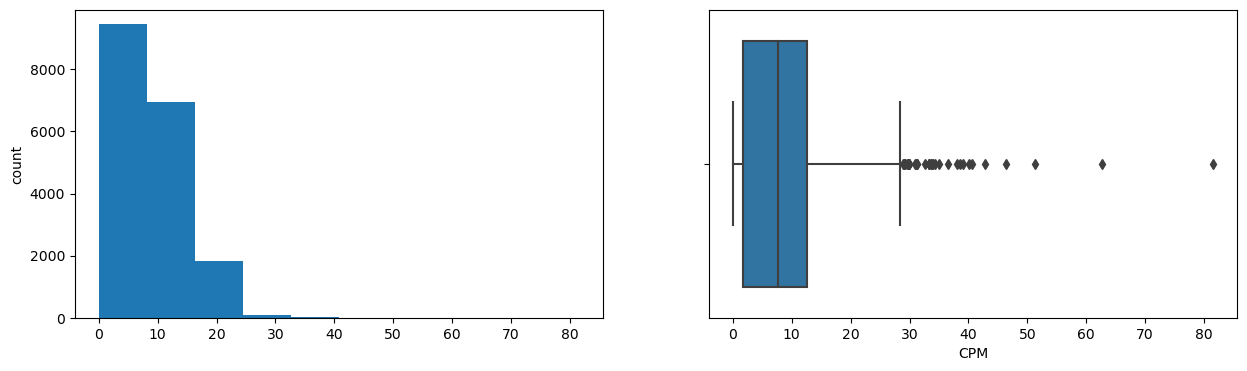

CPC
Skew : 1.85


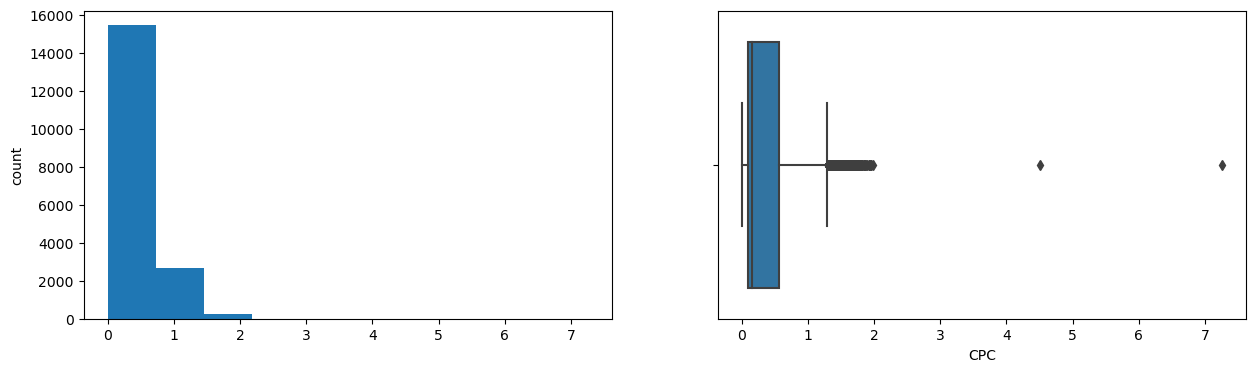

In [212]:
for col in df_num.columns:
    print(col)
    print('Skew :',round(df_num[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df_num[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df_num[col])
    plt.show()

C:\Users\Nitheesh\AppData\Local\Temp\ipykernel_7508\4026466922.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_ad.corr(), annot = True, cmap="YlGnBu")


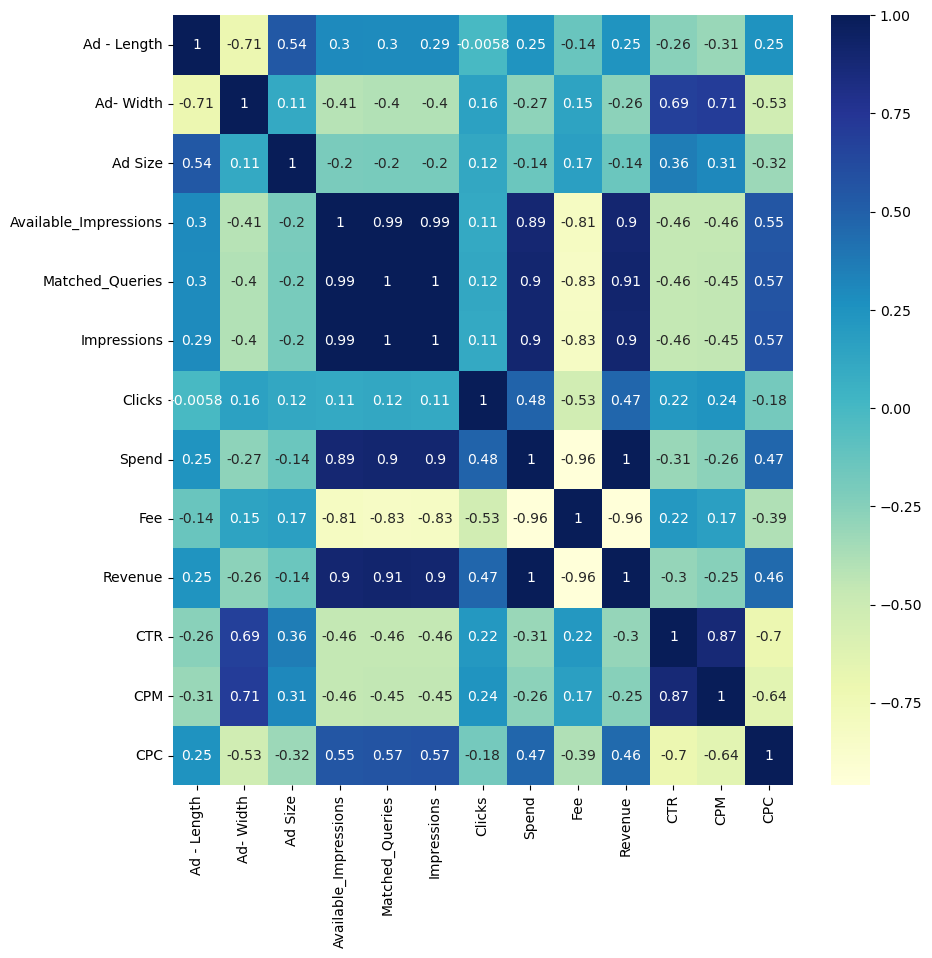

In [213]:
plt.figure(figsize  = (10,10))
sns.heatmap(data_ad.corr(), annot = True, cmap="YlGnBu")
plt.show()

Treating missing values in CPC, CTR and CPM using the formula given.

In [214]:
# Calculate CTR (Click Through Rate)
data_ad['CTR'] = (data_ad['Clicks'] / data_ad['Impressions']) * 100

# Calculate CPM (Cost Per Mille or cost per 1000 impressions)
data_ad['CPM'] = (data_ad['Spend'] / data_ad['Impressions']) * 1000

# Calculate CPC (Cost Per Click)
data_ad['CPC'] = data_ad['Spend'] / data_ad['Clicks']

data_ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [215]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

In [216]:
# The count of outliers in each column
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).sum()

Ad - Length                 0
Ad- Width                   0
Ad Size                  8448
Available_Impressions    2378
Matched_Queries          3192
Impressions              3269
Clicks                   1691
Spend                    2081
Fee                      3517
Revenue                  2325
CTR                        44
CPM                        34
CPC                       412
dtype: int64

In [217]:
((df_num > (Q3 + 1.5 * IQR)) & (df_num < df_num.quantile(0.95))).sum()

Ad - Length                 0
Ad- Width                   0
Ad Size                   659
Available_Impressions    1224
Matched_Queries          2038
Impressions              2115
Clicks                    537
Spend                     927
Fee                         0
Revenue                  1171
CTR                         0
CPM                         0
CPC                         0
dtype: int64

In [218]:
no_outlier = ['Ad - Length','Ad- Width']

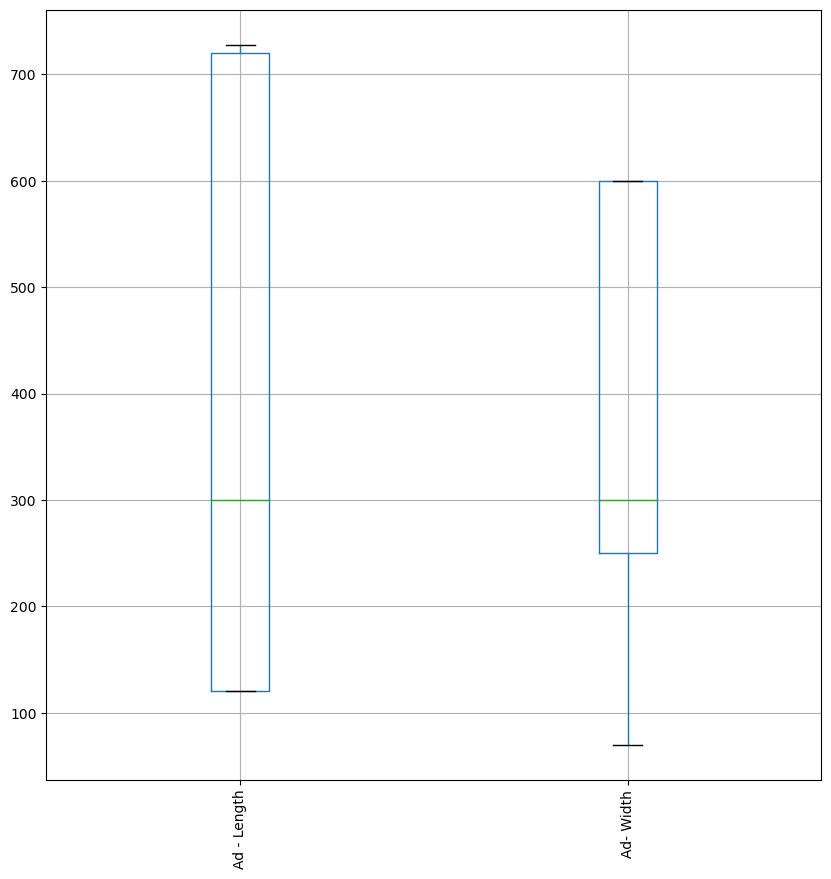

In [219]:
df_num[no_outlier].boxplot(figsize=(10,10))
plt.xticks(rotation=90)
plt.show()

In [220]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    q95=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return x.apply(lambda y: q95 if y > q95 else y).apply(lambda y: q5 if y < q5 else y)

In [221]:
outlier_list = [x for x in df_num.columns if x not in no_outlier]
for i in df_num[outlier_list]:    
    df_num[i]=treat_outlier(df_num[i])

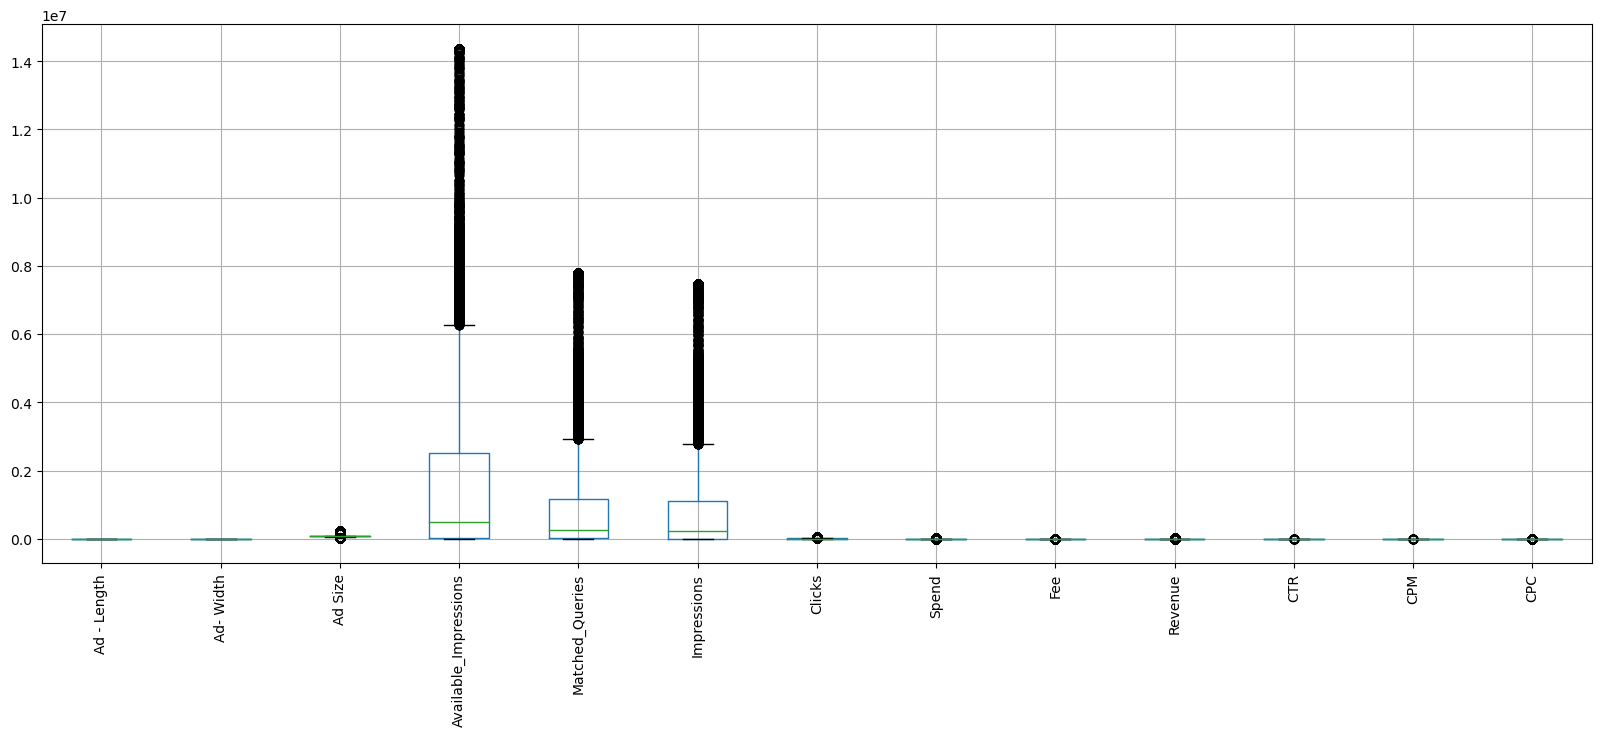

In [222]:
df_num.boxplot(figsize=(20,7))
plt.xticks(rotation=90)
plt.show()

In [223]:
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).sum()

Ad - Length                 0
Ad- Width                   0
Ad Size                  8448
Available_Impressions    2378
Matched_Queries          3192
Impressions              3269
Clicks                   1691
Spend                    2081
Fee                      3517
Revenue                  2325
CTR                        44
CPM                        34
CPC                       412
dtype: int64

In [228]:
data_ad.describe().T

count          mean           std           min  \
Ad - Length            23066.0  3.851631e+02  2.336514e+02    120.000000   
Ad- Width              23066.0  3.378960e+02  2.030929e+02     70.000000   
Ad Size                23066.0  9.667447e+04  6.153833e+04  33600.000000   
Available_Impressions  23066.0  2.432044e+06  4.742888e+06      1.000000   
Matched_Queries        23066.0  1.295099e+06  2.512970e+06      1.000000   
Impressions            23066.0  1.241520e+06  2.429400e+06      1.000000   
Clicks                 23066.0  1.067852e+04  1.735341e+04      1.000000   
Spend                  23066.0  2.706626e+03  4.067927e+03      0.000000   
Fee                    23066.0  3.351231e-01  3.196322e-02      0.210000   
Revenue                23066.0  1.924252e+03  3.105238e+03      0.000000   
CTR                    23066.0  8.409941e+00  9.262048e+00      0.010874   
CPM                    23066.0  8.396849e+00  9.057760e+00      0.000000   
CPC                    23066.0  3.366776e-01  3.412527e-01      0.000000   

                                25%            50%           75%           max  
Ad - Length              120.000000     300.000000  7.200000e+02  7.280000e+02  
Ad- Width                250.000000     300.000000  6.000000e+02  6.000000e+02  
Ad Size                72000.000000   72000.000000  8.400000e+04  2.160000e+05  
Available_Impressions  33672.250000  483771.000000  2.527712e+06  2.759286e+07  
Matched_Queries        18282.500000  258087.500000  1.180700e+06  1.470202e+07  
Impressions             7990.500000  225290.000000  1.112428e+06  1.419477e+07  
Clicks                   710.000000    4425.000000  1.279375e+04  1.430490e+05  
Spend                     85.180000    1425.125000  3.121400e+03  2.693187e+04  
Fee                        0.330000       0.350000  3.500000e-01  3.500000e-01  
Revenue                   55.365375     926.335000  2.091338e+03  2.127618e+04  
CTR                        0.265107       9.391248  1.347057e+01  2.000000e+02  
CPM                        1.749084       8.371566  1.304202e+01  7.150000e+02  
CPC                        0.089736       0.139347  5.462421e-01  7.264000e+00

#### Hierarchical Clustering

In [190]:
wardlink = linkage(scaled_df, method = 'ward', metric = 'euclidean')

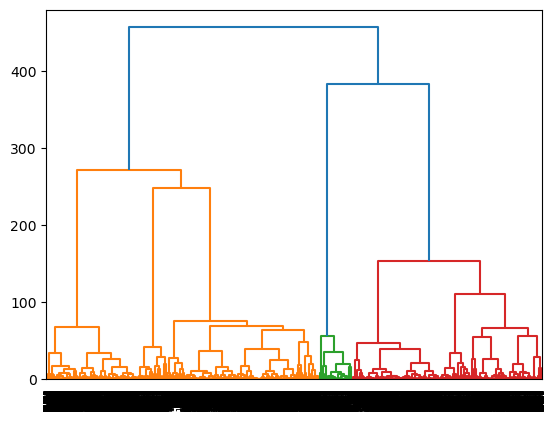

In [193]:
dend = dendrogram(wardlink)

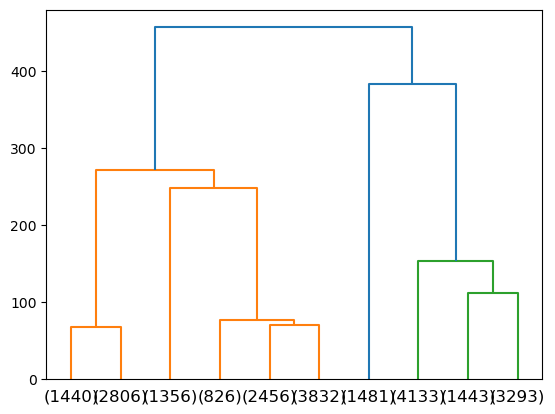

In [192]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [48]:
from scipy.cluster.hierarchy import fcluster


In [50]:
clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [52]:
data_ad['clusters'] = clusters

In [54]:
data_ad.head()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-10       Format1          300        250    75000  Inter227   
2  2020-9-1-22       Format1          300        250    75000  Inter222   
3  2020-9-3-20       Format1          300        250    75000  Inter228   
4  2020-9-4-15       Format1          300        250    75000  Inter217   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0    Video     Desktop  Display                   1806              325   
1      App      Mobile    Video                   1780              285   
2    Video     Desktop  Display                   2727              356   
3    Video      Mobile    Video                   2430              497   
4      Web     Desktop    Video                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue       CTR  CPM  CPC  clusters  
0          323       1    0.0  0.35      0.0  0.309598  0.0  0.0         1  
1          285       1    0.0  0.35      0.0  0.350877  0.0  0.0         1  
2          355       1    0.0  0.35      0.0  0.281690  0.0  0.0         1  
3          495       1    0.0  0.35      0.0  0.202020  0.0  0.0         1  
4          242       1    0.0  0.35      0.0  0.413223  0.0  0.0         1

In [56]:
data_ad.clusters.value_counts().sort_index()


1    18985
2     1274
3     2807
Name: clusters, dtype: int64

#### K-Means Clustering

In [231]:
X = StandardScaler()
scaled_df = X.fit_transform(df_num)
scaled_df

array([[-0.3644957 , -0.43279676, -0.3522185 , ..., -0.87459265,
        -0.92705387, -0.98661455],
       [-0.3644957 , -0.43279676, -0.3522185 , ..., -0.87013569,
        -0.92705387, -0.98661455],
       [-0.3644957 , -0.43279676, -0.3522185 , ..., -0.87760581,
        -0.92705387, -0.98661455],
       ...,
       [ 1.43309269, -0.18659865,  1.93908609, ...,  9.88896203,
         4.59319464, -0.8400924 ],
       [-1.13489073,  1.29058999, -0.40096966, ...,  9.88896203,
         6.80129404, -0.78148354],
       [ 1.43309269, -0.18659865,  1.93908609, ...,  4.4904711 ,
         4.04116979, -0.72287468]])

In [232]:
wss =[] 
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

wss

C:\Users\Nitheesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nitheesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nitheesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nitheesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set 

[299857.9999999995,
 188281.47599039154,
 130712.21765046913,
 94685.80115563374,
 66289.09673895742,
 55262.53674048788,
 49134.19717078091,
 43831.13291074021,
 38918.121068615445,
 35333.939163877294]

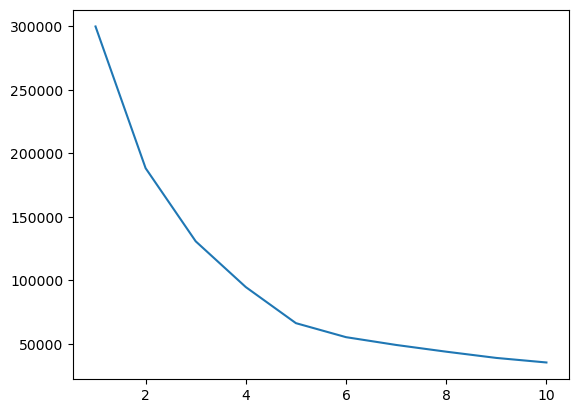

In [233]:
plt.plot(range(1,11), wss)

In [248]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df)
labels = k_means.labels_

C:\Users\Nitheesh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [244]:
data_ad["Clus_kmeans"] = labels
data_ad.head(5)

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-10       Format1          300        250    75000  Inter227   
2  2020-9-1-22       Format1          300        250    75000  Inter222   
3  2020-9-3-20       Format1          300        250    75000  Inter228   
4  2020-9-4-15       Format1          300        250    75000  Inter217   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0    Video     Desktop  Display                   1806              325   
1      App      Mobile    Video                   1780              285   
2    Video     Desktop  Display                   2727              356   
3    Video      Mobile    Video                   2430              497   
4      Web     Desktop    Video                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue       CTR  CPM  CPC  Clus_kmeans  
0          323       1    0.0  0.35      0.0  0.309598  0.0  0.0            3  
1          285       1    0.0  0.35      0.0  0.350877  0.0  0.0            3  
2          355       1    0.0  0.35      0.0  0.281690  0.0  0.0            3  
3          495       1    0.0  0.35      0.0  0.202020  0.0  0.0            3  
4          242       1    0.0  0.35      0.0  0.413223  0.0  0.0            3

In [236]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [249]:
silhouette_score(scaled_df,labels)

0.557117025455947

In [250]:
sil_width = silhouette_samples(scaled_df,labels)

In [251]:
silhouette_samples(scaled_df,labels).min()

-0.04564954670365346

### Principal Component Analysis

In [252]:
data_census = pd.read_excel(r"C:\Users\Nitheesh\Downloads\PCA+India+Data_Census.xlsx")

In [253]:
data_census.head(10)

State Code  Dist.Code            State    Area Name  No_HH  TOT_M  TOT_F  \
0           1          1  Jammu & Kashmir      Kupwara   7707  23388  29796   
1           1          2  Jammu & Kashmir       Badgam   6218  19585  23102   
2           1          3  Jammu & Kashmir  Leh(Ladakh)   4452   6546  10964   
3           1          4  Jammu & Kashmir       Kargil   1320   2784   4206   
4           1          5  Jammu & Kashmir        Punch  11654  20591  29981   
5           1          6  Jammu & Kashmir      Rajouri  16345  25290  37426   
6           1          7  Jammu & Kashmir       Kathua  12510  22793  30491   
7           1          8  Jammu & Kashmir     Baramula   9414  22960  30509   
8           1          9  Jammu & Kashmir    Bandipore   3814  10319  13058   
9           1         10  Jammu & Kashmir     Srinagar  15095  39014  52278   

   M_06  F_06  M_SC  F_SC  M_ST   F_ST  M_LIT  F_LIT  M_ILL  F_ILL  \
0  5862  6196     3     0  1999   2598  13381  11364  10007  18432   
1  4482  3733     7     6   427    517  10513   7891   9072  15211   
2  1082  1018     3     6  5806   9723   4534   5840   2012   5124   
3   563   677     0     0  2666   3968   1842   1962    942   2244   
4  5157  4587    20    33  7670  10843  13243  13477   7348  16504   
5  6155  5294  2588  4000  7796  11111  16471  18782   8819  18644   
6  3928  3200  5357  6906   988   1311  16735  17123   6058  13368   
7  4246  4099     0     0   945   1180  14692  12936   8268  17573   
8  1646  1779     0     0  1749   2308   5820   4661   4499   8397   
9  6269  5704    11     3   200    237  25837  27124  13177  25154   

   TOT_WORK_M  TOT_WORK_F  MAINWORK_M  MAINWORK_F  MAIN_CL_M  MAIN_CL_F  \
0        6723        3752        2763        1275        486        235   
1        6982        4200        4628        1733       1098        357   
2        2775        4800        1940        2923        519       1205   
3        1002        1118         491         408         35        102   
4        5717        7692        2523        2267        743        766   
5        9191       13592        4210        3860       1452       1750   
6        9537        5237        7167        3244       1549        994   
7        9257        4921        5524        2232        920        367   
8        4698        3851        2696        1184        422        167   
9       18596        9937       15795        6464        195        125   

   MAIN_AL_M  MAIN_AL_F  MAIN_HH_M  MAIN_HH_F  MAIN_OT_M  MAIN_OT_F  \
0        407        143         78         86       1792        811   
1        442        108        538        343       2550        925   
2         36         71         19         55       1366       1592   
3          8         24          9          6        439        276   
4        254        237         35         64       1491       1200   
5        294        191         63        108       2401       1811   
6        557        198         83         80       4978       1972   
7        694        146        218        177       3692       1542   
8        426        152        410        281       1438        584   
9        270         76        476        386      14854       5877   

   MARGWORK_M  MARGWORK_F  MARG_CL_M  MARG_CL_F  MARG_AL_M  MARG_AL_F  \
0        3960        2477        619        580       2052        641   
1        2354        2467        384        661        915        547   
2         835        1877        360       1250         44        157   
3         511         710        135        286         63        176   
4        3194        5425       1327       2462       1037       1069   
5        4981        9732       3149       6058        762        795   
6        2370        1993        599        869        563        397   
7        3733        2689        600        729       1690        675   
8        2002        2667        335        672        767        730   
9        2801        347

In [254]:
data_census.shape

(640, 61)

In [255]:
data_census.dtypes

State Code         int64
Dist.Code          int64
State             object
Area Name         object
No_HH              int64
TOT_M              int64
TOT_F              int64
M_06               int64
F_06               int64
M_SC               int64
F_SC               int64
M_ST               int64
F_ST               int64
M_LIT              int64
F_LIT              int64
M_ILL              int64
F_ILL              int64
TOT_WORK_M         int64
TOT_WORK_F         int64
MAINWORK_M         int64
MAINWORK_F         int64
MAIN_CL_M          int64
MAIN_CL_F          int64
MAIN_AL_M          int64
MAIN_AL_F          int64
MAIN_HH_M          int64
MAIN_HH_F          int64
MAIN_OT_M          int64
MAIN_OT_F          int64
MARGWORK_M         int64
MARGWORK_F         int64
MARG_CL_M          int64
MARG_CL_F          int64
MARG_AL_M          int64
MARG_AL_F          int64
MARG_HH_M          int64
MARG_HH_F          int64
MARG_OT_M          int64
MARG_OT_F          int64
MARGWORK_3_6_M     int64


In [256]:
data_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [257]:
data_census[data_census.duplicated()]

Empty DataFrame
Columns: [State Code, Dist.Code, State, Area Name, No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F, MARGWORK_M, MARGWORK_F, MARG_CL_M, MARG_CL_F, MARG_AL_M, MARG_AL_F, MARG_HH_M, MARG_HH_F, MARG_OT_M, MARG_OT_F, MARGWORK_3_6_M, MARGWORK_3_6_F, MARG_CL_3_6_M, MARG_CL_3_6_F, MARG_AL_3_6_M, MARG_AL_3_6_F, MARG_HH_3_6_M, MARG_HH_3_6_F, MARG_OT_3_6_M, MARG_OT_3_6_F, MARGWORK_0_3_M, MARGWORK_0_3_F, MARG_CL_0_3_M, MARG_CL_0_3_F, MARG_AL_0_3_M, MARG_AL_0_3_F, MARG_HH_0_3_M, MARG_HH_0_3_F, MARG_OT_0_3_M, MARG_OT_0_3_F, NON_WORK_M, NON_WORK_F]
Index: []

In [7]:
data_census.describe().T

count           mean            std    min       25%      50%  \
State Code      640.0      17.114062       9.426486    1.0      9.00     18.0   
Dist.Code       640.0     320.500000     184.896367    1.0    160.75    320.5   
No_HH           640.0   51222.871875   48135.405475  350.0  19484.00  35837.0   
TOT_M           640.0   79940.576563   73384.511114  391.0  30228.00  58339.0   
TOT_F           640.0  122372.084375  113600.717282  698.0  46517.75  87724.5   
M_06            640.0   12309.098438   11500.906881   56.0   4733.75   9159.0   
F_06            640.0   11942.300000   11326.294567   56.0   4672.25   8663.0   
M_SC            640.0   13820.946875   14426.373130    0.0   3466.25   9591.5   
F_SC            640.0   20778.392188   21727.887713    0.0   5603.25  13709.0   
M_ST            640.0    6191.807813    9912.668948    0.0    293.75   2333.5   
F_ST            640.0   10155.640625   15875.701488    0.0    429.50   3834.5   
M_LIT           640.0   57967.979688   55910.282466  286.0  21298.00  42693.5   
F_LIT           640.0   66359.565625   75037.860207  371.0  20932.00  43796.5   
M_ILL           640.0   21972.596875   19825.605268  105.0   8590.00  15767.5   
F_ILL           640.0   56012.518750   47116.693769  327.0  22367.00  42386.0   
TOT_WORK_M      640.0   37992.407813   36419.537491  100.0  13753.50  27936.5   
TOT_WORK_F      640.0   41295.760938   37192.360943  357.0  16097.75  30588.5   
MAINWORK_M      640.0   30204.446875   31480.915680   65.0   9787.00  21250.5   
MAINWORK_F      640.0   28198.846875   29998.262689  240.0   9502.25  18484.0   
MAIN_CL_M       640.0    5424.342188    4739.161969    0.0   2023.50   4160.5   
MAIN_CL_F       640.0    5486.042188    5326.362728    0.0   1920.25   3908.5   
MAIN_AL_M       640.0    5849.109375    6399.507966    0.0   1070.25   3936.5   
MAIN_AL_F       640.0    8925.995312   12864.287584    0.0   1408.75   3933.5   
MAIN_HH_M       640.0     883.893750    1278.642345    0.0    187.50    498.5   
MAIN_HH_F       640.0    1380.773438    3179.414449    0.0    248.75    540.5   
MAIN_OT_M       640.0   18047.101562   26068.480886   36.0   3997.50   9598.0   
MAIN_OT_F       640.0   12406.035938   18972.202369  153.0   3142.50   6380.5   
MARGWORK_M      640.0    7787.960938    7410.791691   35.0   2937.50   5627.0   
MARGWORK_F      640.0   13096.914062   10996.474528  117.0   5424.50  10175.0   
MARG_CL_M       640.0    1040.737500    1311.546847    0.0    311.75    606.5   
MARG_CL_F       640.0    2307.682813    3564.626095    0.0    630.25   1226.0   
MARG_AL_M       640.0    3304.326562    3781.555707    0.0    873.50   2062.0   
MARG_AL_F       640.0    6463.281250    6773.876298    0.0   1402.50   4020.5   
MARG_HH_M       640.0     316.742188     462.661891    0.0     71.75    166.0   
MARG_HH_F       640.0     786.626562    1198.718213    0.0    171.75    429.0   
MARG_OT_M       640.0    3126.154687    3609.391821    7.0    935.50   2036.0   
MARG_OT_F       640.0    3539.323438    4115.191314   19.0   1071.75   2349.5   
MARGWORK_3_6_M  640.0   41948.168750   39045.316918  291.0  16208.25  30315.0   
MARGWORK_3_6_F  640.0   81076.323438   82970.406216  341.0  26619.50  56793.0   
MARG_CL_3_6_M   640.0    6394.987500    6019.806644   27.0   2372.00   4630.0   
MARG_CL_3_6_F   640.0   10339.864063    8467.473429   85.0   4351.50   8295.0   
MARG_AL_3_6_M   640.0     789.848438     905.639279    0.0    235.50    480.5   
MARG_AL_3_6_F   640.0    1749.584375    2496.541514    0.0    497.25    985.5   
MARG_HH_3_6_M   640.0    2743.635938    3059.586387    0.0    718.75   1714.5   
MARG_HH_3_6_F   640.0    5169.850000    5335.640960    0.0   1113.75   3294.0   
MARG_OT_3_6_M   640.0     245.362500     358.728567    0.0     58.00    129.5   
MARG_OT_3_6_F   640.0     585.884375     900.025817    0.0    127.75    320.5   
MARGWORK_0_3_M  640.0    2616.140625    3036.964381    7.0    755.00   1681.5   
MARGWORK_0_3_F  640.0    2834.545312    3327.83

In [259]:
df_cat = data_census.select_dtypes(include = ['object'])
lstcatcolumns = list(df_cat.columns.values)
lstcatcolumns

['State', 'Area Name']

In [260]:
df_num = data_census.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

59

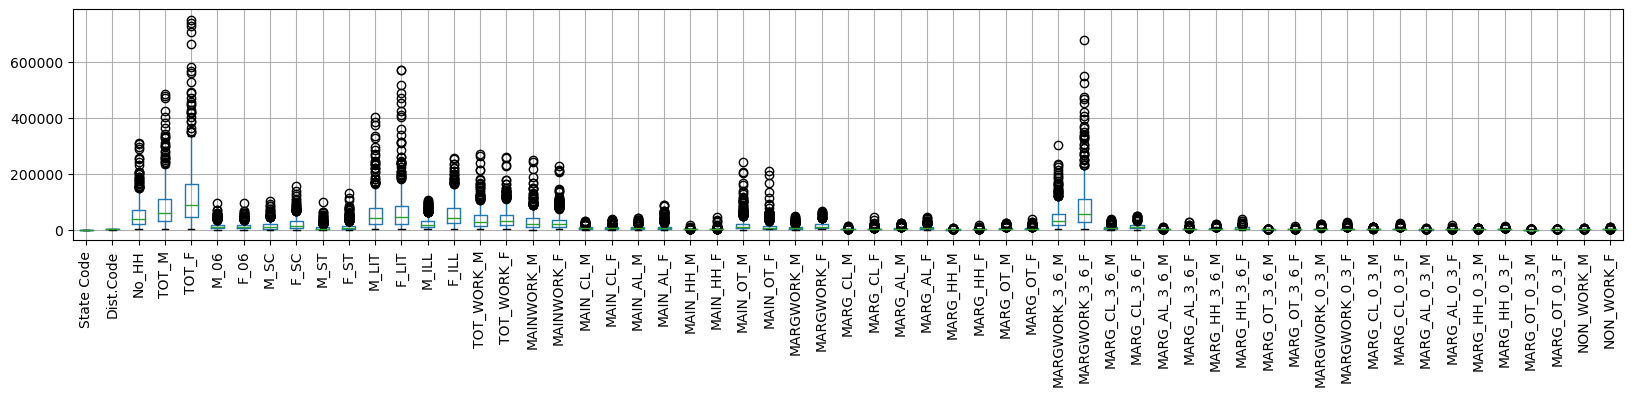

In [261]:
df_num.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

In [262]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
# The count of outliers in each column
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).sum()

State Code         0
Dist.Code          0
No_HH             31
TOT_M             25
TOT_F             26
M_06              32
F_06              33
M_SC              29
F_SC              29
M_ST              51
F_ST              58
M_LIT             30
F_LIT             37
M_ILL             39
F_ILL             26
TOT_WORK_M        32
TOT_WORK_F        42
MAINWORK_M        36
MAINWORK_F        55
MAIN_CL_M         25
MAIN_CL_F         29
MAIN_AL_M         36
MAIN_AL_F         60
MAIN_HH_M         47
MAIN_HH_F         56
MAIN_OT_M         53
MAIN_OT_F         59
MARGWORK_M        43
MARGWORK_F        19
MARG_CL_M         55
MARG_CL_F         53
MARG_AL_M         48
MARG_AL_F         30
MARG_HH_M         58
MARG_HH_F         39
MARG_OT_M         46
MARG_OT_F         42
MARGWORK_3_6_M    31
MARGWORK_3_6_F    32
MARG_CL_3_6_M     44
MARG_CL_3_6_F     15
MARG_AL_3_6_M     56
MARG_AL_3_6_F     49
MARG_HH_3_6_M     43
MARG_HH_3_6_F     25
MARG_OT_3_6_M     58
MARG_OT_3_6_F     40
MARGWORK_0_3_

In [263]:
((df_num > (Q3 + 1.5 * IQR)) & (df_num < df_num.quantile(0.95))).sum()

State Code         0
Dist.Code          0
No_HH              0
TOT_M              0
TOT_F              0
M_06               0
F_06               1
M_SC               0
F_SC               0
M_ST              19
F_ST              26
M_LIT              0
F_LIT              5
M_ILL              7
F_ILL              0
TOT_WORK_M         0
TOT_WORK_F        10
MAINWORK_M         4
MAINWORK_F        23
MAIN_CL_M          0
MAIN_CL_F          0
MAIN_AL_M          4
MAIN_AL_F         28
MAIN_HH_M         15
MAIN_HH_F         24
MAIN_OT_M         21
MAIN_OT_F         27
MARGWORK_M        11
MARGWORK_F         0
MARG_CL_M         23
MARG_CL_F         21
MARG_AL_M         16
MARG_AL_F          0
MARG_HH_M         26
MARG_HH_F          7
MARG_OT_M         14
MARG_OT_F         10
MARGWORK_3_6_M     0
MARGWORK_3_6_F     0
MARG_CL_3_6_M     12
MARG_CL_3_6_F      0
MARG_AL_3_6_M     24
MARG_AL_3_6_F     17
MARG_HH_3_6_M     11
MARG_HH_3_6_F      0
MARG_OT_3_6_M     26
MARG_OT_3_6_F      8
MARGWORK_0_3_

In [265]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    q95=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return x.apply(lambda y: q95 if y > q95 else y).apply(lambda y: q5 if y < q5 else y)

In [266]:
no_outlier = ['State Code','Dist.Code']

In [268]:
outlier_list = [x for x in df_num.columns if x not in no_outlier]
for i in df_num[outlier_list]:    
    df_num[i]=treat_outlier(df_num[i])

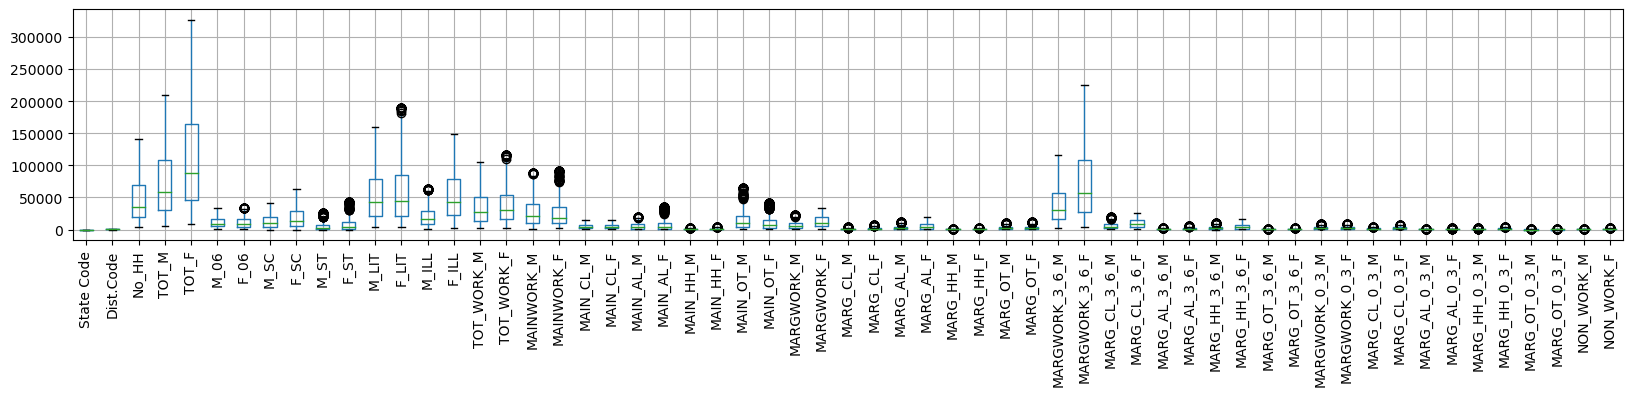

In [269]:
df_num.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

In [21]:
corr = df_num.corr(method='pearson')

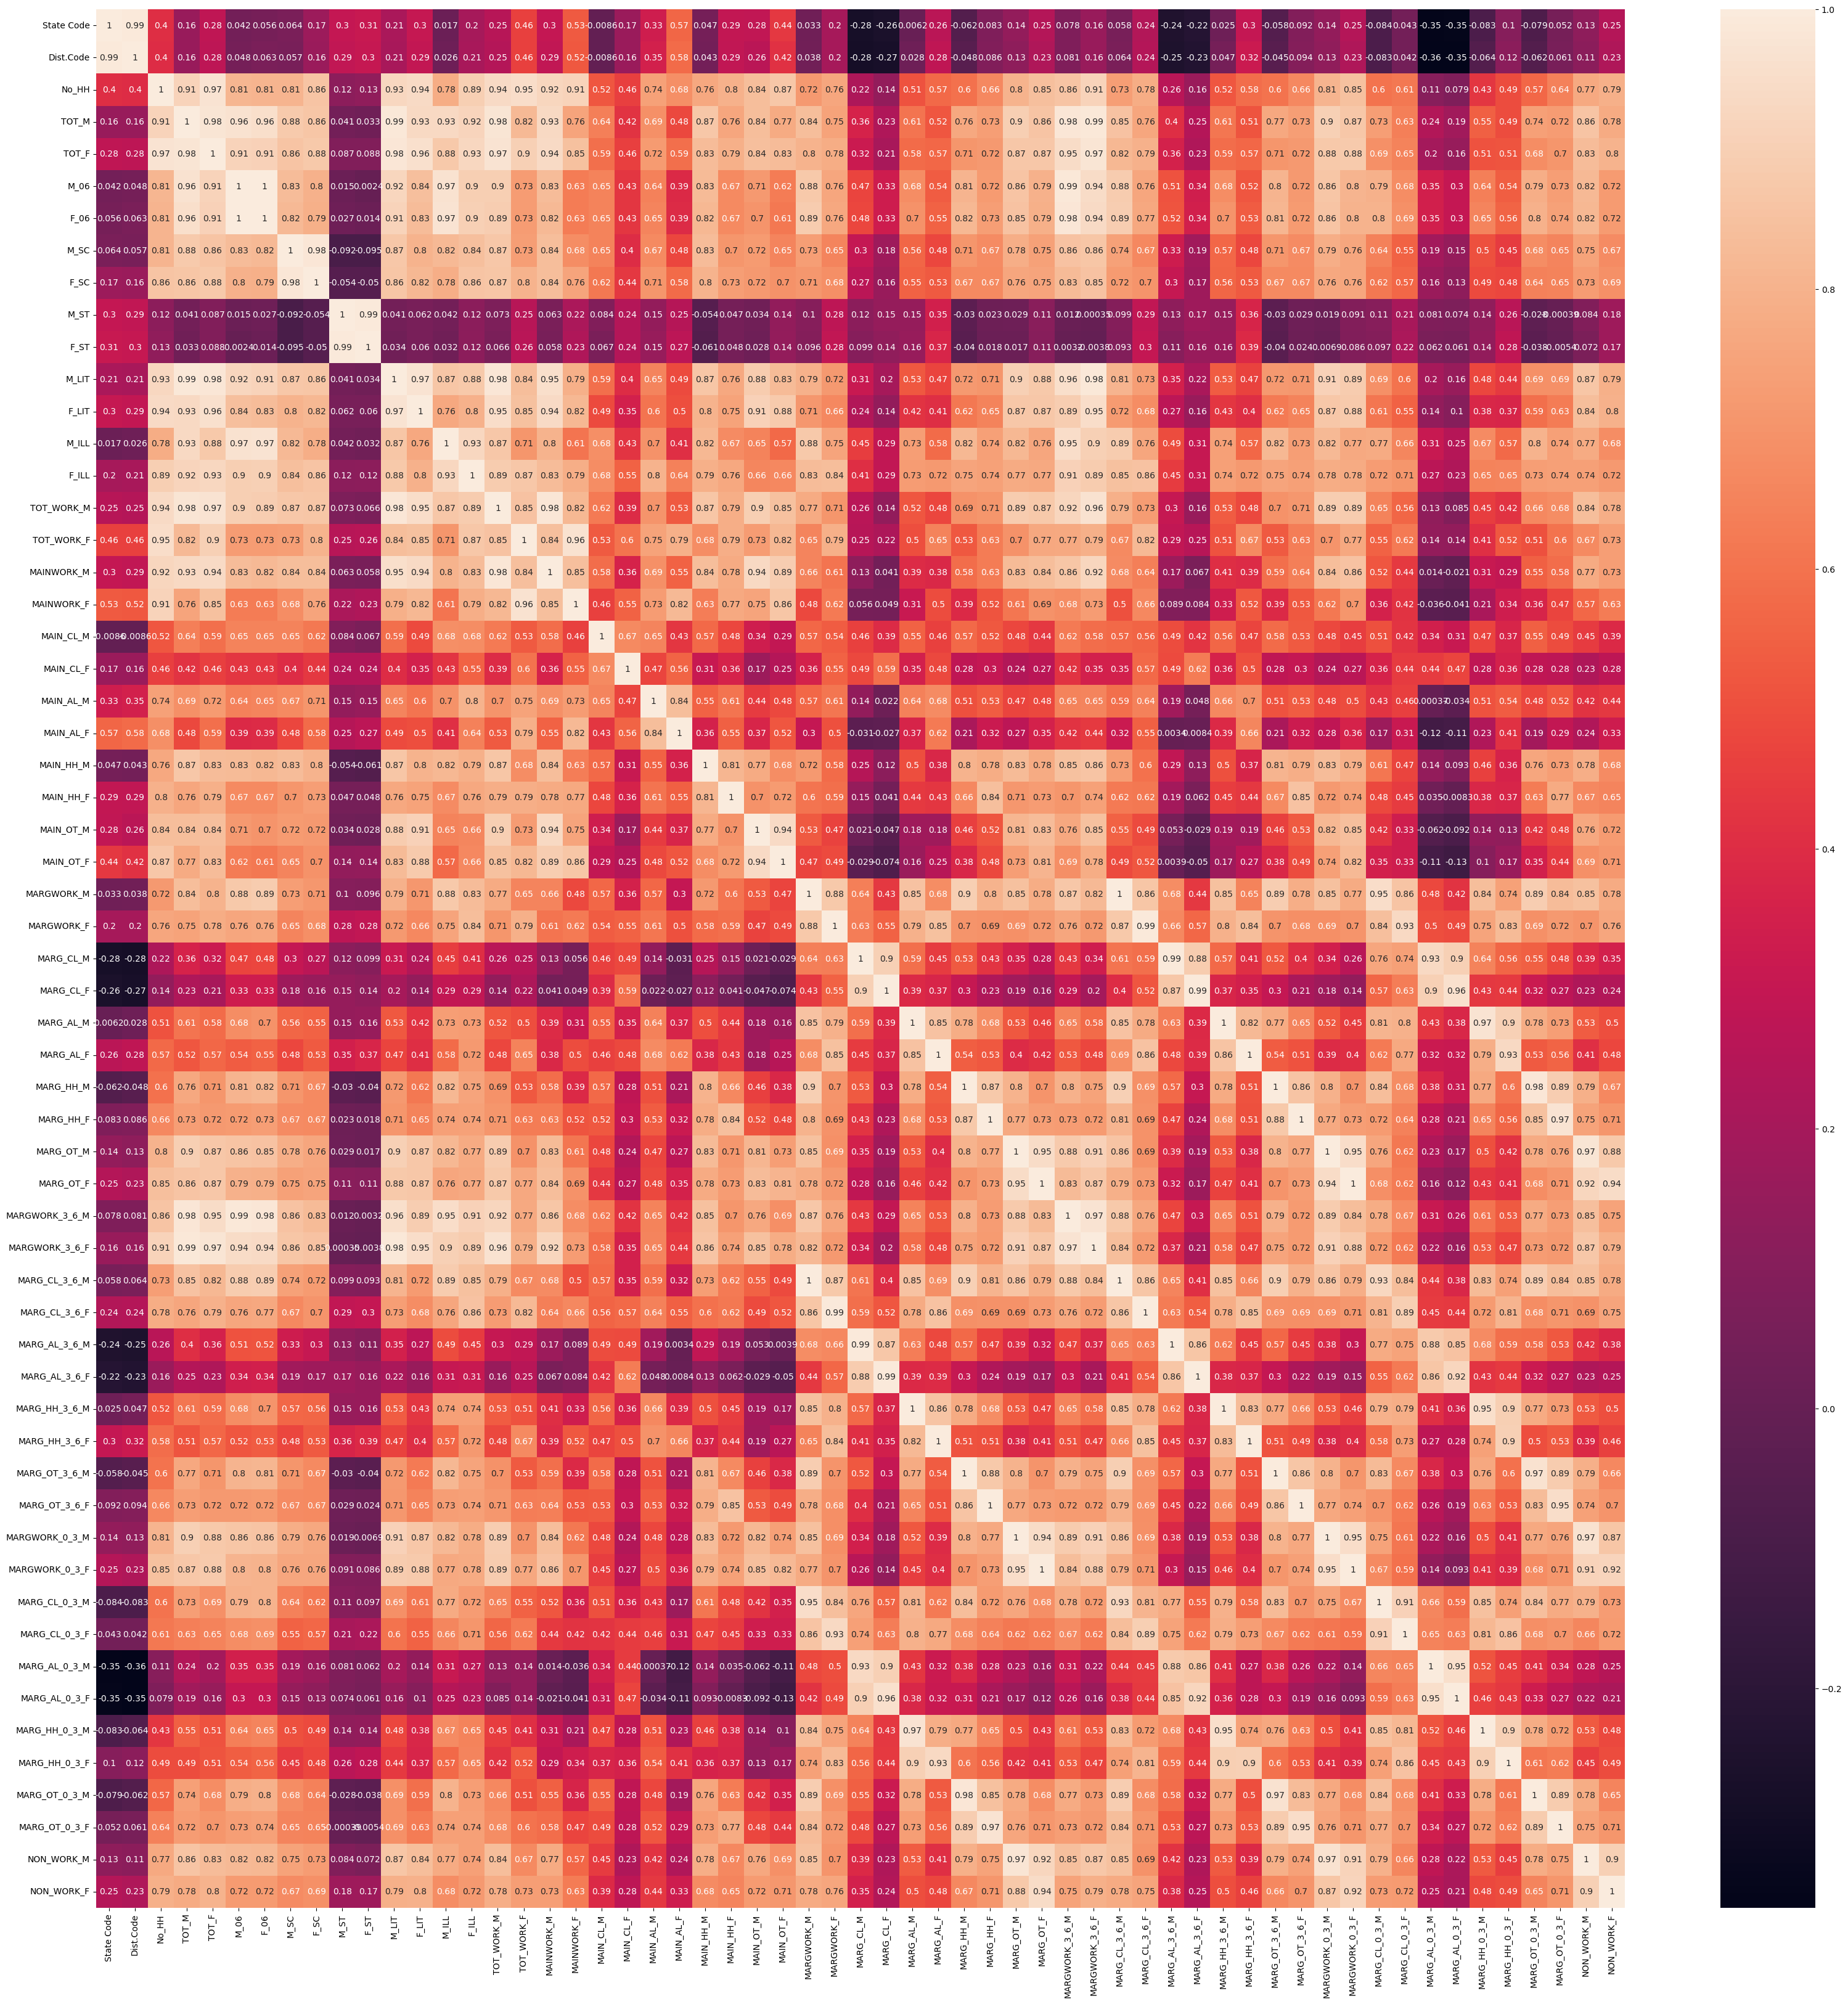

In [25]:
plt.figure(figsize=(40,40))
sns.heatmap(df_num.corr(), annot=True)
plt.show()

In [270]:
data_eda = data_census[['State Code','Dist.Code','No_HH','TOT_M','TOT_F','M_LIT','F_LIT','TOT_WORK_M','TOT_WORK_F']]
data_eda.head()

State Code  Dist.Code  No_HH  TOT_M  TOT_F  M_LIT  F_LIT  TOT_WORK_M  \
0           1          1   7707  23388  29796  13381  11364        6723   
1           1          2   6218  19585  23102  10513   7891        6982   
2           1          3   4452   6546  10964   4534   5840        2775   
3           1          4   1320   2784   4206   1842   1962        1002   
4           1          5  11654  20591  29981  13243  13477        5717   

   TOT_WORK_F  
0        3752  
1        4200  
2        4800  
3        1118  
4        7692

In [271]:
data_eda['Gender_Ratio'] = data_eda['TOT_F'] / data_eda['TOT_M']

C:\Users\Nitheesh\AppData\Local\Temp\ipykernel_7508\1437534815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_eda['Gender_Ratio'] = data_eda['TOT_F'] / data_eda['TOT_M']


In [272]:
data_eda.head()

State Code  Dist.Code  No_HH  TOT_M  TOT_F  M_LIT  F_LIT  TOT_WORK_M  \
0           1          1   7707  23388  29796  13381  11364        6723   
1           1          2   6218  19585  23102  10513   7891        6982   
2           1          3   4452   6546  10964   4534   5840        2775   
3           1          4   1320   2784   4206   1842   1962        1002   
4           1          5  11654  20591  29981  13243  13477        5717   

   TOT_WORK_F  Gender_Ratio  
0        3752      1.273987  
1        4200      1.179576  
2        4800      1.674916  
3        1118      1.510776  
4        7692      1.456024

In [273]:
data_eda.describe().T

count           mean            std         min           25%  \
State Code    640.0      17.114062       9.426486    1.000000      9.000000   
Dist.Code     640.0     320.500000     184.896367    1.000000    160.750000   
No_HH         640.0   51222.871875   48135.405475  350.000000  19484.000000   
TOT_M         640.0   79940.576563   73384.511114  391.000000  30228.000000   
TOT_F         640.0  122372.084375  113600.717282  698.000000  46517.750000   
M_LIT         640.0   57967.979688   55910.282466  286.000000  21298.000000   
F_LIT         640.0   66359.565625   75037.860207  371.000000  20932.000000   
TOT_WORK_M    640.0   37992.407813   36419.537491  100.000000  13753.500000   
TOT_WORK_F    640.0   41295.760938   37192.360943  357.000000  16097.750000   
Gender_Ratio  640.0       1.553535       0.229059    1.151993      1.369432   

                       50%            75%           max  
State Code       18.000000      24.000000      35.00000  
Dist.Code       320.500000     480.250000     640.00000  
No_HH         35837.000000   68892.000000  310450.00000  
TOT_M         58339.000000  107918.500000  485417.00000  
TOT_F         87724.500000  164251.750000  750392.00000  
M_LIT         42693.500000   77989.500000  403261.00000  
F_LIT         43796.500000   84799.750000  571140.00000  
TOT_WORK_M    27936.500000   50226.750000  269422.00000  
TOT_WORK_F    30588.500000   53234.250000  257848.00000  
Gender_Ratio      1.517921       1.704349       2.28325

In [274]:
District_highest = data_eda.loc[data_eda['Gender_Ratio'].idxmax(), 'Dist.Code']
District_lowest = data_eda.loc[data_eda['Gender_Ratio'].idxmin(), 'Dist.Code']
high_District= data_census.loc[data_census['Dist.Code']==District_highest,'Area Name']
low_District= data_census.loc[data_census['Dist.Code']==District_lowest,'Area Name']
print(f"State with the highest gender ratio: {high_state}")
print(f"State with the lowest gender ratio: {low_state}")

State with the highest gender ratio: 531                       Adilabad
532                      Nizamabad
533                     Karimnagar
534                          Medak
535                      Hyderabad
536                     Rangareddy
537                    Mahbubnagar
538                       Nalgonda
539                       Warangal
540                        Khammam
541                     Srikakulam
542                   Vizianagaram
543                  Visakhapatnam
544                  East Godavari
545                  West Godavari
546                        Krishna
547                         Guntur
548                       Prakasam
549    Sri Potti Sriramulu Nellore
550                         Y.S.R.
551                        Kurnool
552                      Anantapur
553                       Chittoor
Name: Area Name, dtype: object
State with the lowest gender ratio: 586    Lakshadweep
Name: Area Name, dtype: object


In [275]:
state_gender_ratio = data_census.groupby('State')['TOT_F', 'TOT_M'].sum()
state_gender_ratio['Gender_Ratio'] = state_gender_ratio['TOT_F'] / state_gender_ratio['TOT_M']

C:\Users\Nitheesh\AppData\Local\Temp\ipykernel_7508\773989643.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  state_gender_ratio = data_census.groupby('State')['TOT_F', 'TOT_M'].sum()


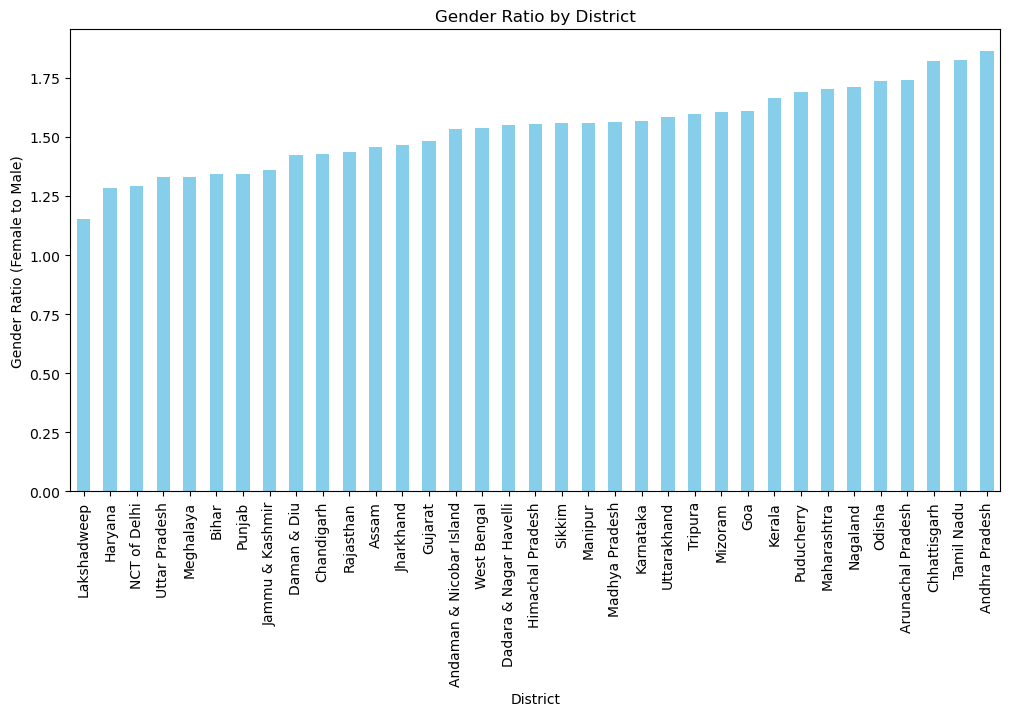

In [52]:
plt.figure(figsize=(12, 6))
state_gender_ratio['Gender_Ratio'].sort_values().plot(kind='bar', color='skyblue')
plt.title('Gender Ratio by District')
plt.xlabel('District')
plt.ylabel('Gender Ratio (Female to Male)')
plt.show()

In [276]:
state_highest = state_gender_ratio['Gender_Ratio'].idxmax()
state_lowest = state_gender_ratio['Gender_Ratio'].idxmin()

print(f"State with the highest gender ratio: {state_highest}")
print(f"State with the lowest gender ratio: {state_lowest}")

State with the highest gender ratio: Andhra Pradesh
State with the lowest gender ratio: Lakshadweep


In [279]:
df_num1 = df_num.drop(columns=['State Code','Dist.Code'])
df_num1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 57 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No_HH           640 non-null    float64
 1   TOT_M           640 non-null    float64
 2   TOT_F           640 non-null    float64
 3   M_06            640 non-null    float64
 4   F_06            640 non-null    float64
 5   M_SC            640 non-null    float64
 6   F_SC            640 non-null    float64
 7   M_ST            640 non-null    float64
 8   F_ST            640 non-null    float64
 9   M_LIT           640 non-null    float64
 10  F_LIT           640 non-null    float64
 11  M_ILL           640 non-null    float64
 12  F_ILL           640 non-null    float64
 13  TOT_WORK_M      640 non-null    float64
 14  TOT_WORK_F      640 non-null    float64
 15  MAINWORK_M      640 non-null    float64
 16  MAINWORK_F      640 non-null    float64
 17  MAIN_CL_M       640 non-null    flo

In [280]:
from scipy.stats import zscore
df_num_scaled=df_num1.apply(zscore)
df_num_scaled.head()

No_HH     TOT_M     TOT_F      M_06      F_06      M_SC      F_SC  \
0 -1.045413 -0.891110 -0.948660 -0.627308 -0.561599 -1.088303 -1.087824   
1 -1.083562 -0.956160 -1.022642 -0.777021 -0.833263 -1.087971 -1.087492   
2 -1.128808 -1.179189 -1.156789 -1.145879 -1.132722 -1.088303 -1.087492   
3 -1.158017 -1.201256 -1.189416 -1.187978 -1.169783 -1.088552 -1.087824   
4 -0.944289 -0.938952 -0.946616 -0.703792 -0.739068 -1.086892 -1.085999   

       M_ST      F_ST     M_LIT     F_LIT     M_ILL     F_ILL  TOT_WORK_M  \
0 -0.491849 -0.544829 -0.948924 -0.956286 -0.643627 -0.854006   -1.017059   
1 -0.711533 -0.717141 -1.015184 -1.024264 -0.697641 -0.930854   -1.008008   
2  0.040171  0.045141 -1.153320 -1.064409 -1.105493 -1.171516   -1.155025   
3 -0.398637 -0.431389 -1.170952 -1.095107 -1.148243 -1.221048   -1.173757   
4  0.300661  0.137880 -0.952112 -0.914928 -0.797236 -0.900005   -1.052214   

   TOT_WORK_F  MAINWORK_M  MAINWORK_F  MAIN_CL_M  MAIN_CL_F  MAIN_AL_M  \
0   -1.134415   -1.060351   -1.009582  -1.181195  -1.146580  -0.943975   
1   -1.120303   -0.982653   -1.009582  -1.027569  -1.146580  -0.937578   
2   -1.101402   -1.094639   -0.976679  -1.172911  -0.960277  -1.007587   
3   -1.154890   -1.113016   -1.009582  -1.226150  -1.146580  -1.007587   
4   -1.010302   -1.070350   -1.003523  -1.116682  -1.066765  -0.971942   

   MAIN_AL_F  MAIN_HH_M  MAIN_HH_F  MAIN_OT_M  MAIN_OT_F  MARGWORK_M  \
0  -0.809101  -0.874648  -0.831151  -0.837242  -0.904910   -0.562383   
1  -0.812662  -0.300536  -0.610752  -0.792256  -0.894623   -0.823777   
2  -0.816325  -0.948284  -0.857736  -0.862524  -0.834434   -1.071010   
3  -0.816325  -0.953280  -0.880036  -0.911904  -0.907168   -1.123744   
4  -0.799536  -0.928315  -0.850018  -0.855105  -0.869808   -0.687058   

   MARGWORK_F  MARG_CL_M  MARG_CL_F  MARG_AL_M  MARG_AL_F  MARG_HH_M  \
0   -1.080901  -0.357544  -0.707424  -0.339487  -0.939533  -0.455953   
1   -1.081973  -0.613185  -0.666886  -0.705452  -0.955441   0.311314   
2   -1.145181  -0.639293  -0.372103  -0.984517  -1.021441  -0.885217   
3   -1.258532  -0.884056  -0.854566  -0.979685  -1.018226  -0.902117   
4   -0.765075   0.412642   0.234479  -0.666184  -0.867102  -0.726355   

   MARG_HH_F  MARG_OT_M  MARG_OT_F  MARGWORK_3_6_M  MARGWORK_3_6_F  \
0  -0.632803  -0.644524  -0.753308       -0.737429       -0.793693   
1  -0.081671  -0.816808  -0.881298       -0.867294       -0.909168   
2  -0.937869  -0.917711  -0.946640       -1.149658       -1.115121   
3  -0.922040  -0.959941  -1.025118       -1.173962       -1.148207   
4  -0.524879  -0.786163  -0.563682       -0.794688       -0.854406   

   MARG_CL_3_6_M  MARG_CL_3_6_F  MARG_AL_3_6_M  MARG_AL_3_6_F  MARG_HH_3_6_M  \
0      -0.647035      -1.120683      -0.426522      -0.809309      -0.475669   
1      -0.837985      -1.117421      -0.681601      -0.747954      -0.723180   
2      -1.053655      -1.125983      -0.602784      -0.245392      -0.988014   
3      -1.132293      -1.272907      -0.949576      -0.936845      -0.984549   
4      -0.742413      -0.880255       0.179647      -0.067531      -0.683532   

   MARG_HH_3_6_F  MARG_OT_3_6_M  MARG_OT_3_6_F  MARGWORK_0_3_M  \
0      -0.968373      -0.457274      -0.598740       -0.673614   
1      -0.966263       0.333904      -0.115847       -0.827122   
2      -1.024480      -0.867995      -0.925799       -0.915289   
3      -1.023847      -0.898269      -0.916180       -0.987791   
4      -0.888641      -0.768557      -0.567958       -0.808325   

   MARGWORK_0_3_F  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  MARG_AL_0_3_F  \
0       -0.753052      -0.122888      -0.860615      -0.123451      -0.418703   
1       -0.889856      -0.696298      -0.876717      -0.357235      -0.434251   
2       -0.929722      -1.073371      -1.126300      -0.681253      -0.706343   
3       -1.022044      -0.999975      -1.098358      -0.611528      -0.630546   
4       -0.627579      -0.376106      -0.302248       1.045473       1.147770

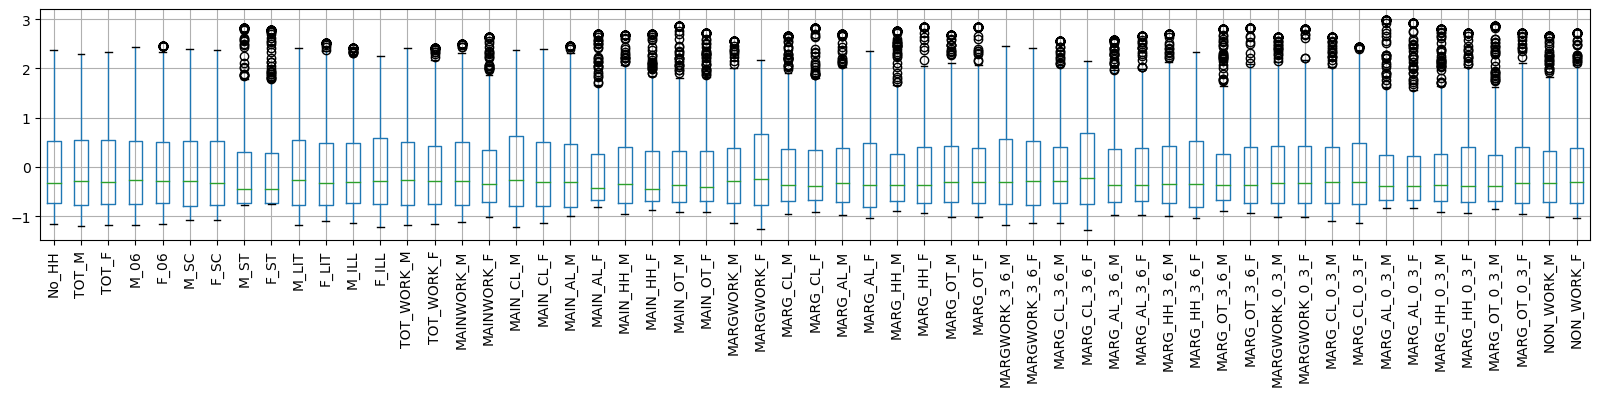

In [281]:
df_num_scaled.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

In [282]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_num_scaled)
p_value

0.0

In [283]:
# Format the p-value with 4 decimal places
formatted_p_value = f"{p_value:.4f}"
# Print the formatted p-value
print(formatted_p_value)

0.0000


In [284]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_num_scaled)
kmo_model

C:\Users\Nitheesh\anaconda3\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.9309154696802355

In [285]:
from sklearn.decomposition import PCA
pca = PCA(n_components=33, random_state=123)
df_pca = pca.fit_transform(df_num_scaled)
df_pca.transpose().round(2)

array([[-5.47, -5.49, -7.25, ..., -7.47, -7.57, -7.17],
       [ 0.36, -0.06, -0.18, ..., -0.8 , -0.84, -1.17],
       [-1.49, -1.93, -0.43, ..., -0.98, -0.94, -0.98],
       ...,
       [ 0.02, -0.03,  0.02, ..., -0.01,  0.02, -0.  ],
       [ 0.05, -0.1 , -0.07, ..., -0.04, -0.01, -0.02],
       [-0.17, -0.02,  0.03, ...,  0.02, -0.01,  0.01]])

In [286]:
df_pca.round(2)

array([[-5.47,  0.36, -1.49, ...,  0.02,  0.05, -0.17],
       [-5.49, -0.06, -1.93, ..., -0.03, -0.1 , -0.02],
       [-7.25, -0.18, -0.43, ...,  0.02, -0.07,  0.03],
       ...,
       [-7.47, -0.8 , -0.98, ..., -0.01, -0.04,  0.02],
       [-7.57, -0.84, -0.94, ...,  0.02, -0.01, -0.01],
       [-7.17, -1.17, -0.98, ..., -0.  , -0.02,  0.01]])

In [287]:
#Step 1: Obtaining the Eigen Vectors when the Principal Components are kept exactly as the number of features in the scaled data
print('Eigen Vectors \n %s',pca.components_.round(2))

Eigen Vectors 
 %s [[ 0.15  0.16  0.16 ...  0.14  0.15  0.14]
 [-0.12 -0.08 -0.09 ...  0.04 -0.05 -0.05]
 [ 0.1  -0.03  0.03 ... -0.1  -0.14 -0.04]
 ...
 [-0.19  0.03 -0.04 ... -0.15 -0.02  0.09]
 [-0.27  0.19 -0.04 ...  0.18 -0.1   0.21]
 [-0.21  0.26  0.05 ... -0.07 -0.19  0.01]]


In [288]:
var_exp = pca.explained_variance_ratio_
print(var_exp.round(3))

[0.617 0.136 0.067 0.051 0.035 0.021 0.018 0.008 0.007 0.006 0.005 0.004
 0.003 0.003 0.002 0.002 0.002 0.002 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.    0.    0.    0.    0.    0.    0.    0.   ]


In [289]:
# Step 2: Obtaining the Cumulative Sum of the Expalained Variance 
cum_var_exp = np.cumsum(var_exp)
print('Cumulative Variance Explained in Percentage:',(cum_var_exp*100).round(2))

Cumulative Variance Explained in Percentage: [61.66 75.25 81.99 87.13 90.66 92.77 94.61 95.44 96.1  96.66 97.16 97.53
 97.84 98.12 98.36 98.57 98.75 98.9  99.05 99.18 99.3  99.4  99.48 99.55
 99.61 99.66 99.71 99.75 99.78 99.82 99.84 99.87 99.89]


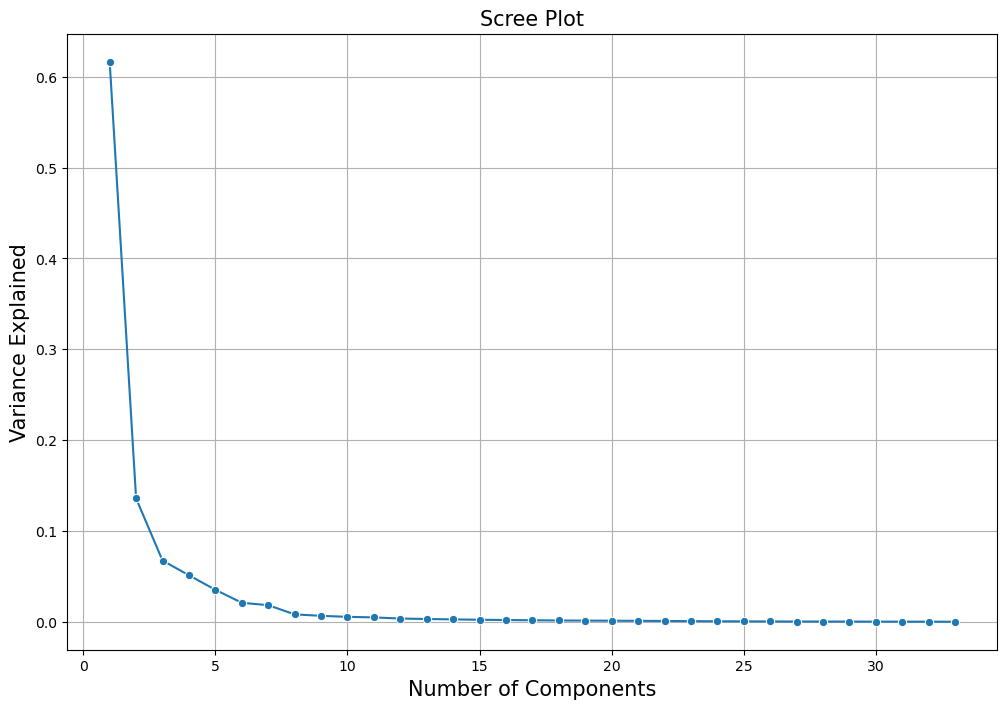

In [147]:
# Step 3 View Scree Plot to identify the number of components to be built
plt.figure(figsize=(12,8))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

In [290]:

from sklearn.decomposition import PCA

pca = PCA(n_components=5, random_state=123)
df_pca = pca.fit_transform(df_num_scaled)
df_pca.transpose().round(2) 

array([[-5.47, -5.49, -7.25, ..., -7.47, -7.57, -7.17],
       [ 0.36, -0.06, -0.18, ..., -0.8 , -0.84, -1.17],
       [-1.49, -1.93, -0.43, ..., -0.98, -0.94, -0.98],
       [-1.13, -1.55, -0.11, ..., -1.03, -0.78, -0.63],
       [ 0.37,  0.01,  0.55, ...,  0.13,  0.01,  0.15]])

In [291]:
df_pca.round(2)

array([[-5.47,  0.36, -1.49, -1.13,  0.37],
       [-5.49, -0.06, -1.93, -1.55,  0.01],
       [-7.25, -0.18, -0.43, -0.11,  0.55],
       ...,
       [-7.47, -0.8 , -0.98, -1.03,  0.13],
       [-7.57, -0.84, -0.94, -0.78,  0.01],
       [-7.17, -1.17, -0.98, -0.63,  0.15]])

In [292]:
df_pca.shape

(640, 5)

In [293]:

pca.components_.round(2)

array([[ 0.15,  0.16,  0.16,  0.16,  0.16,  0.14,  0.14,  0.02,  0.02,
         0.16,  0.15,  0.16,  0.16,  0.16,  0.14,  0.14,  0.12,  0.11,
         0.08,  0.12,  0.09,  0.14,  0.13,  0.12,  0.12,  0.16,  0.15,
         0.09,  0.06,  0.13,  0.12,  0.14,  0.14,  0.15,  0.15,  0.16,
         0.16,  0.16,  0.15,  0.09,  0.06,  0.13,  0.11,  0.14,  0.14,
         0.15,  0.15,  0.14,  0.13,  0.06,  0.05,  0.12,  0.11,  0.14,
         0.14,  0.15,  0.14],
       [-0.12, -0.08, -0.09, -0.02, -0.01, -0.08, -0.08,  0.06,  0.06,
        -0.1 , -0.13, -0.01, -0.02, -0.12, -0.08, -0.17, -0.15,  0.04,
         0.1 , -0.05, -0.09, -0.1 , -0.12, -0.21, -0.21,  0.08,  0.11,
         0.27,  0.27,  0.16,  0.13,  0.05,  0.01, -0.08, -0.1 , -0.04,
        -0.09,  0.07,  0.09,  0.26,  0.26,  0.15,  0.12,  0.05, -0.  ,
        -0.08, -0.11,  0.14,  0.17,  0.28,  0.28,  0.18,  0.18,  0.07,
         0.04, -0.05, -0.05],
       [ 0.1 , -0.03,  0.03, -0.07, -0.06, -0.03,  0.02,  0.3 ,  0.32,
        -0.03, -0

In [294]:
var_exp_1 = pca.explained_variance_ratio_.round(2)

In [153]:

pca.explained_variance_ratio_.round(3)

array([0.617, 0.136, 0.067, 0.051, 0.035])

In [154]:

df_pca_loading = pd.DataFrame(pca.components_.round(2),columns=list(df_num_scaled))
df_pca_loading.shape

(5, 57)

In [155]:
df_pca_loading.head(8)

No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  F_SC  M_ST  F_ST  M_LIT  F_LIT  \
0   0.15   0.16   0.16  0.16  0.16  0.14  0.14  0.02  0.02   0.16   0.15   
1  -0.12  -0.08  -0.09 -0.02 -0.01 -0.08 -0.08  0.06  0.06  -0.10  -0.13   
2   0.10  -0.03   0.03 -0.07 -0.06 -0.03  0.02  0.30  0.32  -0.03  -0.01   
3   0.07   0.05   0.07  0.03  0.01  0.01  0.01  0.08  0.07   0.09   0.13   
4  -0.02  -0.05  -0.03 -0.08 -0.08 -0.18 -0.17  0.43  0.43  -0.03   0.02   

   M_ILL  F_ILL  TOT_WORK_M  TOT_WORK_F  MAINWORK_M  MAINWORK_F  MAIN_CL_M  \
0   0.16   0.16        0.16        0.14        0.14        0.12       0.11   
1  -0.01  -0.02       -0.12       -0.08       -0.17       -0.15       0.05   
2  -0.04   0.09        0.00        0.20        0.02        0.22       0.05   
3  -0.04  -0.02        0.07        0.10        0.10        0.12       0.05   
4  -0.10  -0.11       -0.03       -0.02       -0.05       -0.05      -0.30   

   MAIN_CL_F  MAIN_AL_M  MAIN_AL_F  MAIN_HH_M  MAIN_HH_F  MAIN_OT_M  \
0       0.08       0.12       0.09       0.14       0.13       0.12   
1       0.10      -0.05      -0.09      -0.10      -0.12      -0.21   
2       0.21       0.23       0.36      -0.11       0.02      -0.05   
3       0.24      -0.13      -0.02      -0.02      -0.05       0.15   
4      -0.25      -0.23      -0.18      -0.07      -0.03       0.08   

   MAIN_OT_F  MARGWORK_M  MARGWORK_F  MARG_CL_M  MARG_CL_F  MARG_AL_M  \
0       0.12        0.16        0.15       0.09       0.06       0.13   
1      -0.21        0.08        0.11       0.27       0.27       0.16   
2       0.05       -0.07        0.11      -0.09      -0.02       0.06   
3       0.16       -0.07        0.02       0.16       0.29      -0.25   
4       0.11        0.07        0.08      -0.02      -0.06      -0.03   

   MARG_AL_F  MARG_HH_M  MARG_HH_F  MARG_OT_M  MARG_OT_F  MARGWORK_3_6_M  \
0       0.12       0.14       0.14       0.15       0.15            0.16   
1       0.13       0.05       0.01      -0.08      -0.10           -0.04   
2       0.26      -0.15      -0.09      -0.14      -0.07           -0.06   
3      -0.16      -0.17      -0.15       0.03       0.07            0.04   
4       0.01      -0.00       0.04       0.14       0.19           -0.07   

   MARGWORK_3_6_F  MARG_CL_3_6_M  MARG_CL_3_6_F  MARG_AL_3_6_M  MARG_AL_3_6_F  \
0            0.16           0.16           0.15           0.09           0.06   
1           -0.09           0.07           0.09           0.26           0.26   
2           -0.05          -0.06           0.13          -0.08          -0.00   
3            0.05          -0.09           0.02           0.13           0.30   
4           -0.03           0.06           0.07          -0.02          -0.06   

   MARG_HH_3_6_M  MARG_HH_3_6_F  MARG_OT_3_6_M  MARG_OT_3_6_F  MARGWORK_0_3_M  \
0           0.13           0.11           0.14           0.14            0.15   
1           0.15           0.12           0.05          -0.00           -0.08   
2           0.07           0.28          -0.15          -0.09           -0.14   
3          -0.25          -0.15          -0.16          -0.14            0.03   
4          -0.04           0.00          -0.00           0.04            0.12   

   MARGWORK_0_3_F  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  MARG_AL_0_3_F  \
0            0.15           0.14           0.13           0.06           0.05   
1           -0.11           0.14           0.17           0.28           0.28   
2           -0.07          -0.10           0.04          -0.10          -0.07   
3            0.06          -0.01           0.01           0.22           0.26   
4            0.17           0.09           0.12          -0.03          -0.05   

   MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  \
0           0.12           0.11           0.14           0.14        0.15   
1           0.18           0.18           0.07           0.04       -0.05   
2           0.01           0.15          -0.16          -0.10 

In [156]:
from matplotlib.patches import Rectangle

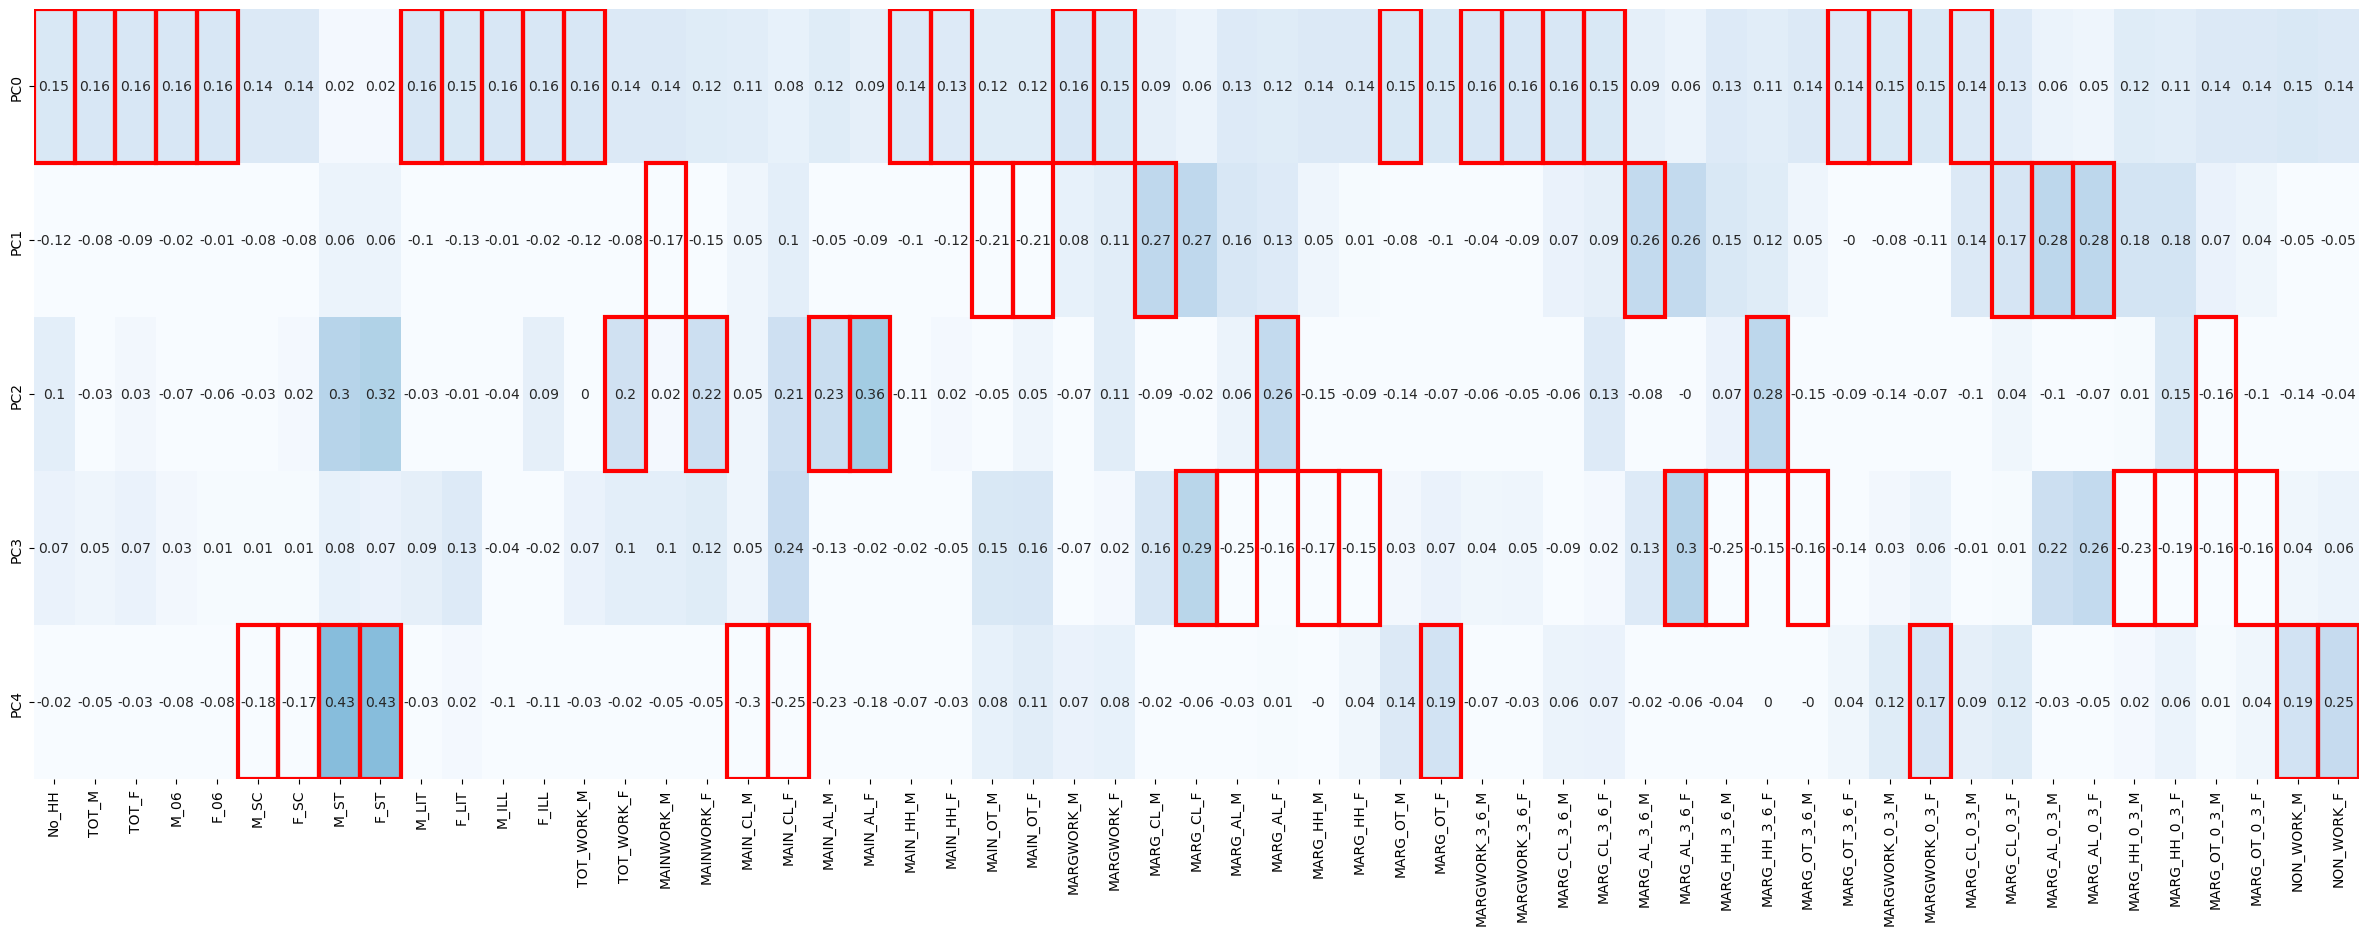

In [157]:
fig,ax = plt.subplots(figsize=(30, 10), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_pca_loading, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC0','PC1','PC2','PC3','PC4'])

column_max = df_pca_loading.abs().idxmax(axis=0)

for col, variable in enumerate(df_pca_loading.columns):
    position = df_pca_loading.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

In [158]:
df_pca = pd.DataFrame(df_pca.round(2),columns=['Socioeconomic_Index','Agricultural_Workforce_Diversity_Index','Female_Workforce_Diversity_Index',
                                  'Marginal_Diversified_Workers','CommunityWellBeingIndex'])
df_pca.head()

Socioeconomic_Index  Agricultural_Workforce_Diversity_Index  \
0                -5.47                                    0.36   
1                -5.49                                   -0.06   
2                -7.25                                   -0.18   
3                -7.56                                   -0.61   
4                -5.16                                    1.86   

   Female_Workforce_Diversity_Index  Marginal_Diversified_Workers  \
0                             -1.49                         -1.13   
1                             -1.93                         -1.55   
2                             -0.43                         -0.11   
3                             -0.74                         -0.68   
4                             -1.09                          0.83   

   CommunityWellBeingIndex  
0                     0.37  
1                     0.01  
2                     0.56  
3                     0.27  
4                     0.99

In [159]:
df_new = pd.concat([df_cat, df_pca], axis=1)

In [160]:
df_new.shape

(640, 7)

In [161]:
df_new.head()

State    Area Name  Socioeconomic_Index  \
0  Jammu & Kashmir      Kupwara                -5.47   
1  Jammu & Kashmir       Badgam                -5.49   
2  Jammu & Kashmir  Leh(Ladakh)                -7.25   
3  Jammu & Kashmir       Kargil                -7.56   
4  Jammu & Kashmir        Punch                -5.16   

   Agricultural_Workforce_Diversity_Index  Female_Workforce_Diversity_Index  \
0                                    0.36                             -1.49   
1                                   -0.06                             -1.93   
2                                   -0.18                             -0.43   
3                                   -0.61                             -0.74   
4                                    1.86                             -1.09   

   Marginal_Diversified_Workers  CommunityWellBeingIndex  
0                         -1.13                     0.37  
1                         -1.55                     0.01  
2                         -0.11                     0.56  
3                         -0.68                     0.27  
4                          0.83                     0.99

In [162]:
df_new.describe(include='all')

State Area Name  Socioeconomic_Index  \
count             640       640           640.000000   
unique             35       635                  NaN   
top     Uttar Pradesh   Raigarh                  NaN   
freq               71         2                  NaN   
mean              NaN       NaN            -0.000188   
std               NaN       NaN             5.932778   
min               NaN       NaN            -7.710000   
25%               NaN       NaN            -4.380000   
50%               NaN       NaN            -1.525000   
75%               NaN       NaN             3.550000   
max               NaN       NaN            17.760000   

        Agricultural_Workforce_Diversity_Index  \
count                               640.000000   
unique                                     NaN   
top                                        NaN   
freq                                       NaN   
mean                                 -0.000031   
std                                   2.785493   
min                                  -7.960000   
25%                                  -1.502500   
50%                                  -0.280000   
75%                                   1.480000   
max                                   8.770000   

        Female_Workforce_Diversity_Index  Marginal_Diversified_Workers  \
count                         640.000000                    640.000000   
unique                               NaN                           NaN   
top                                  NaN                           NaN   
freq                                 NaN                           NaN   
mean                            0.000391                     -0.000141   
std                             1.962776                      1.712181   
min                            -4.660000                     -4.030000   
25%                            -1.270000                     -0.900000   
50%                            -0.425000                     -0.310000   
75%                             1.150000                      0.780000   
max                             6.800000                      6.160000   

        CommunityWellBeingIndex  
count                640.000000  
unique                      NaN  
top                         NaN  
freq                        NaN  
mean                   0.000047  
std                    1.421121  
min                   -3.570000  
25%                   -0.902500  
50%                   -0.105000  
75%                    0.752500  
max                    5.450000

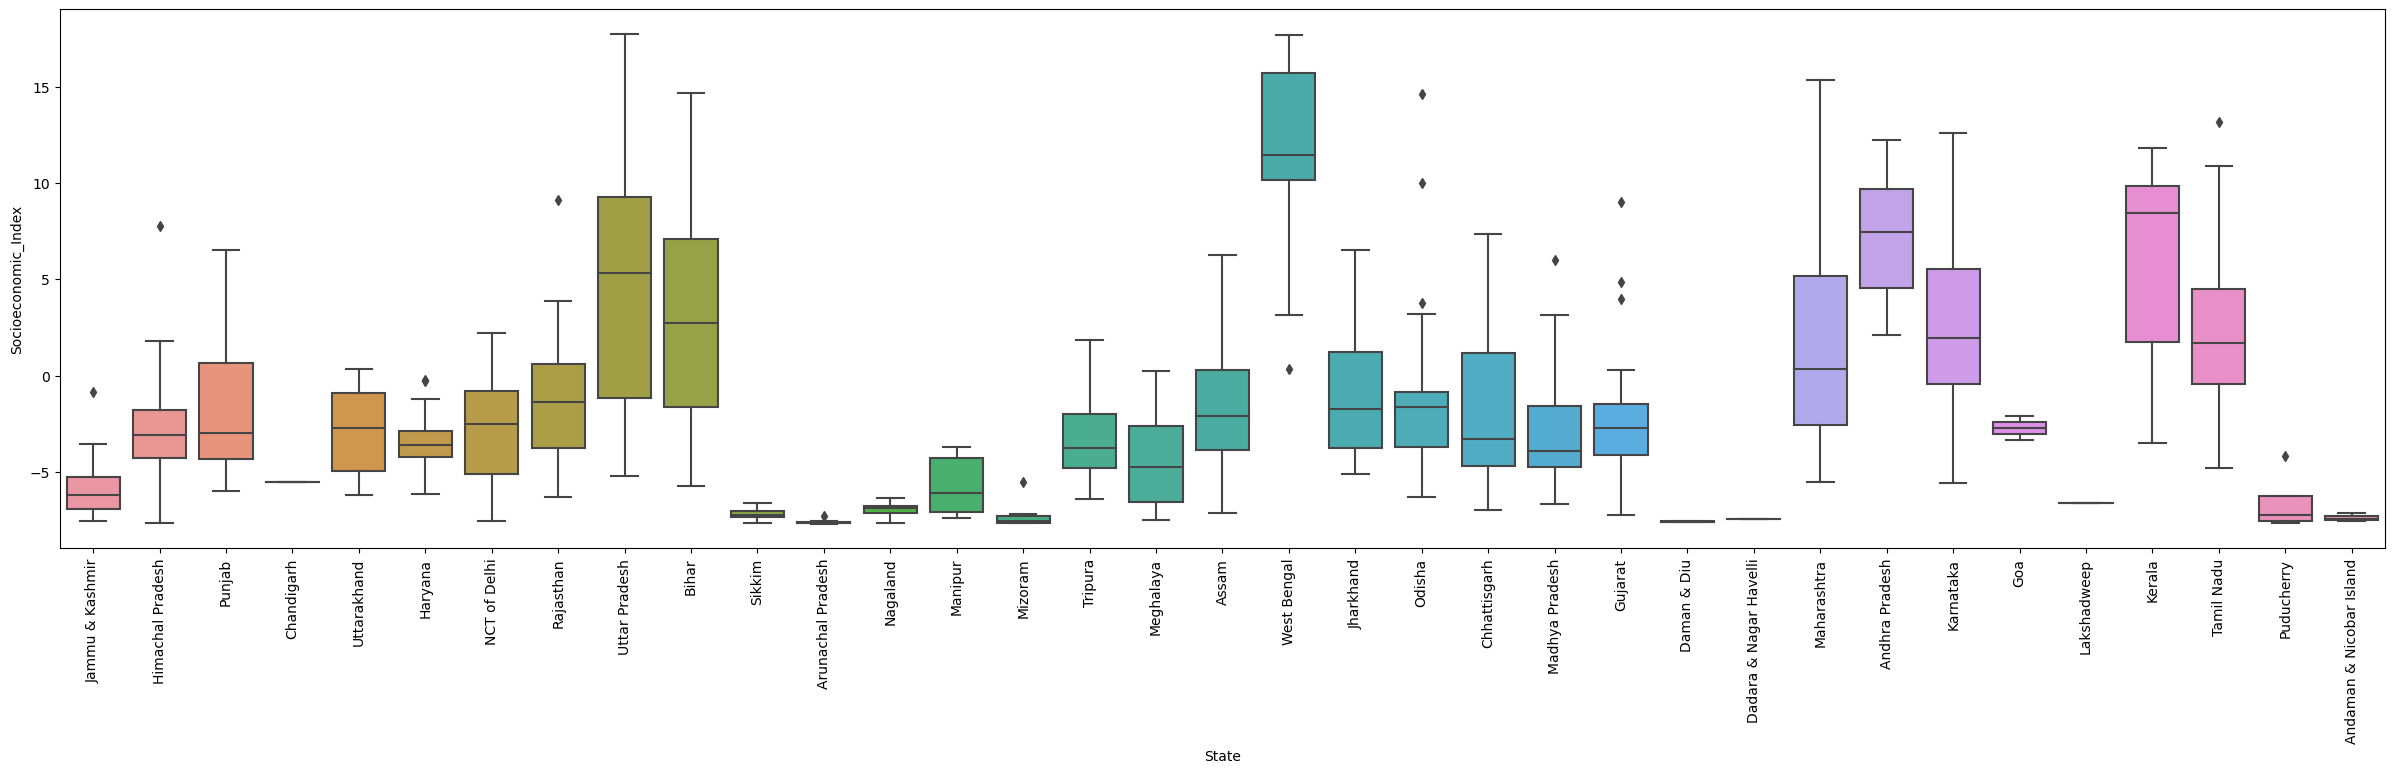

In [163]:
fig,ax = plt.subplots(figsize=(30,7))
sns.boxplot(x='State',y='Socioeconomic_Index', data=df_new)
plt.xticks(rotation=90)
plt.show()

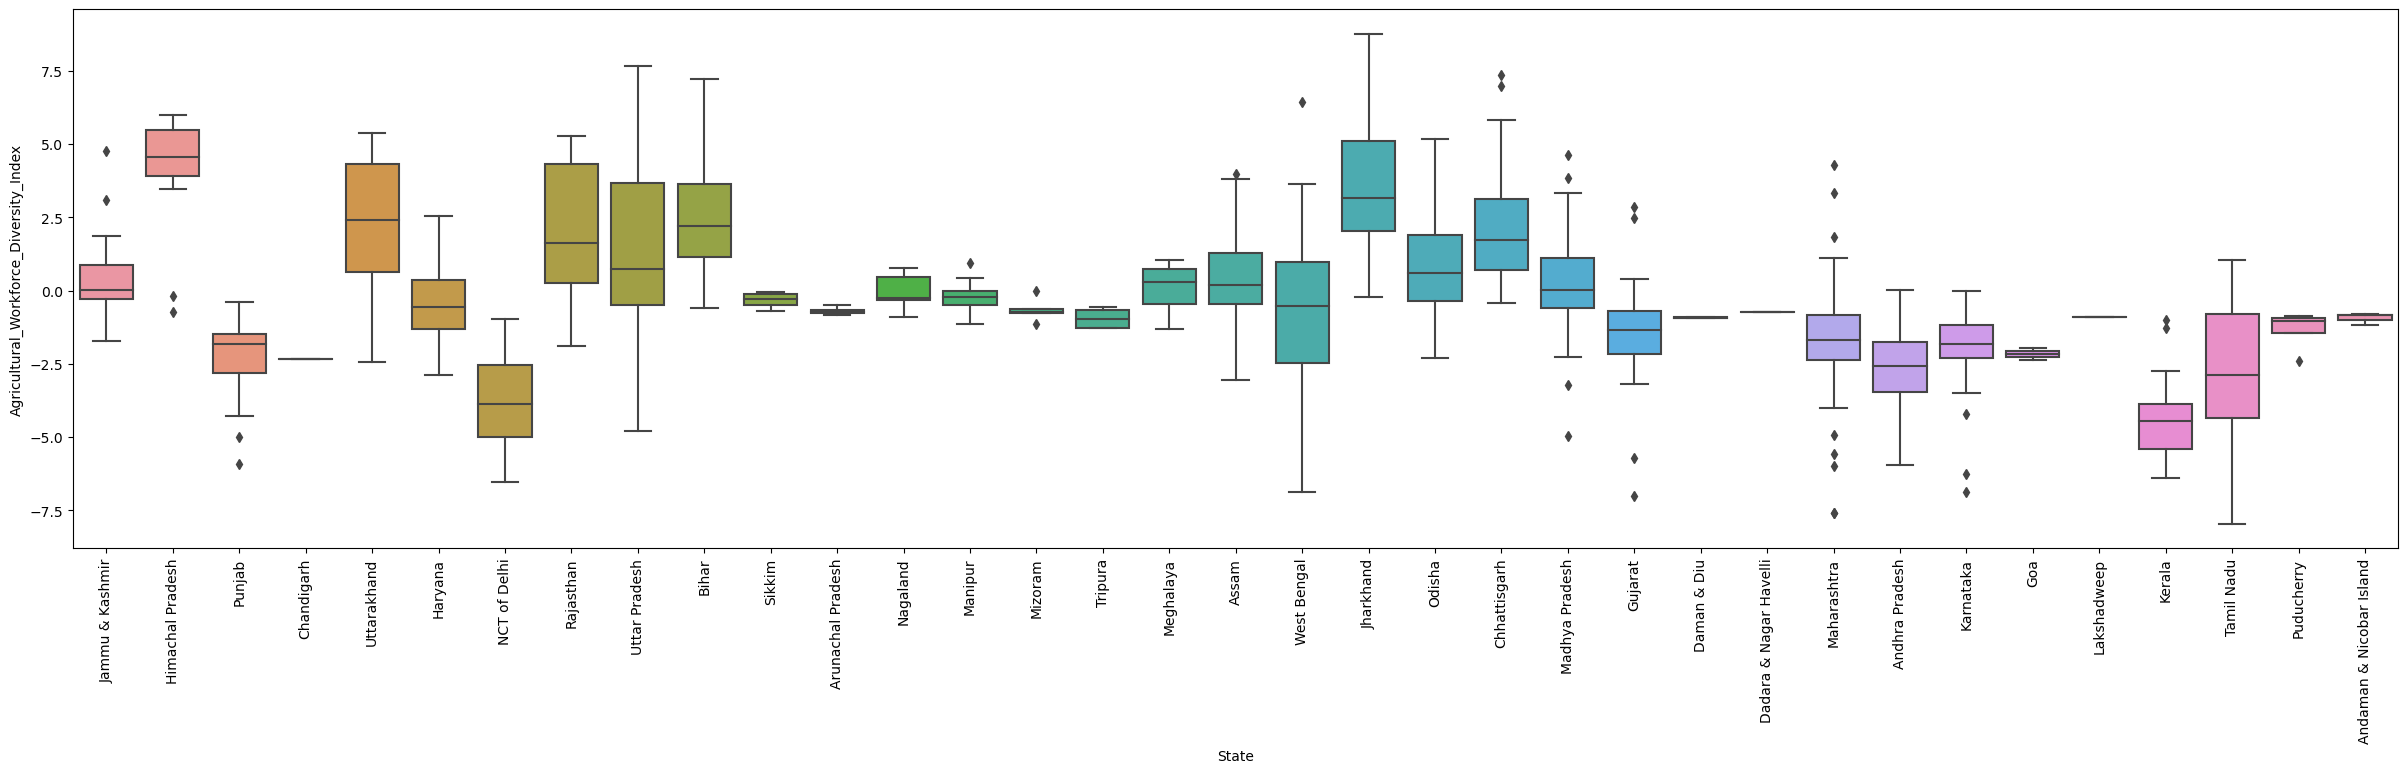

In [122]:
fig,ax = plt.subplots(figsize=(30,7))
sns.boxplot(x='State',y='Agricultural_Workforce_Diversity_Index', data=df_new)
plt.xticks(rotation=90)
plt.show()

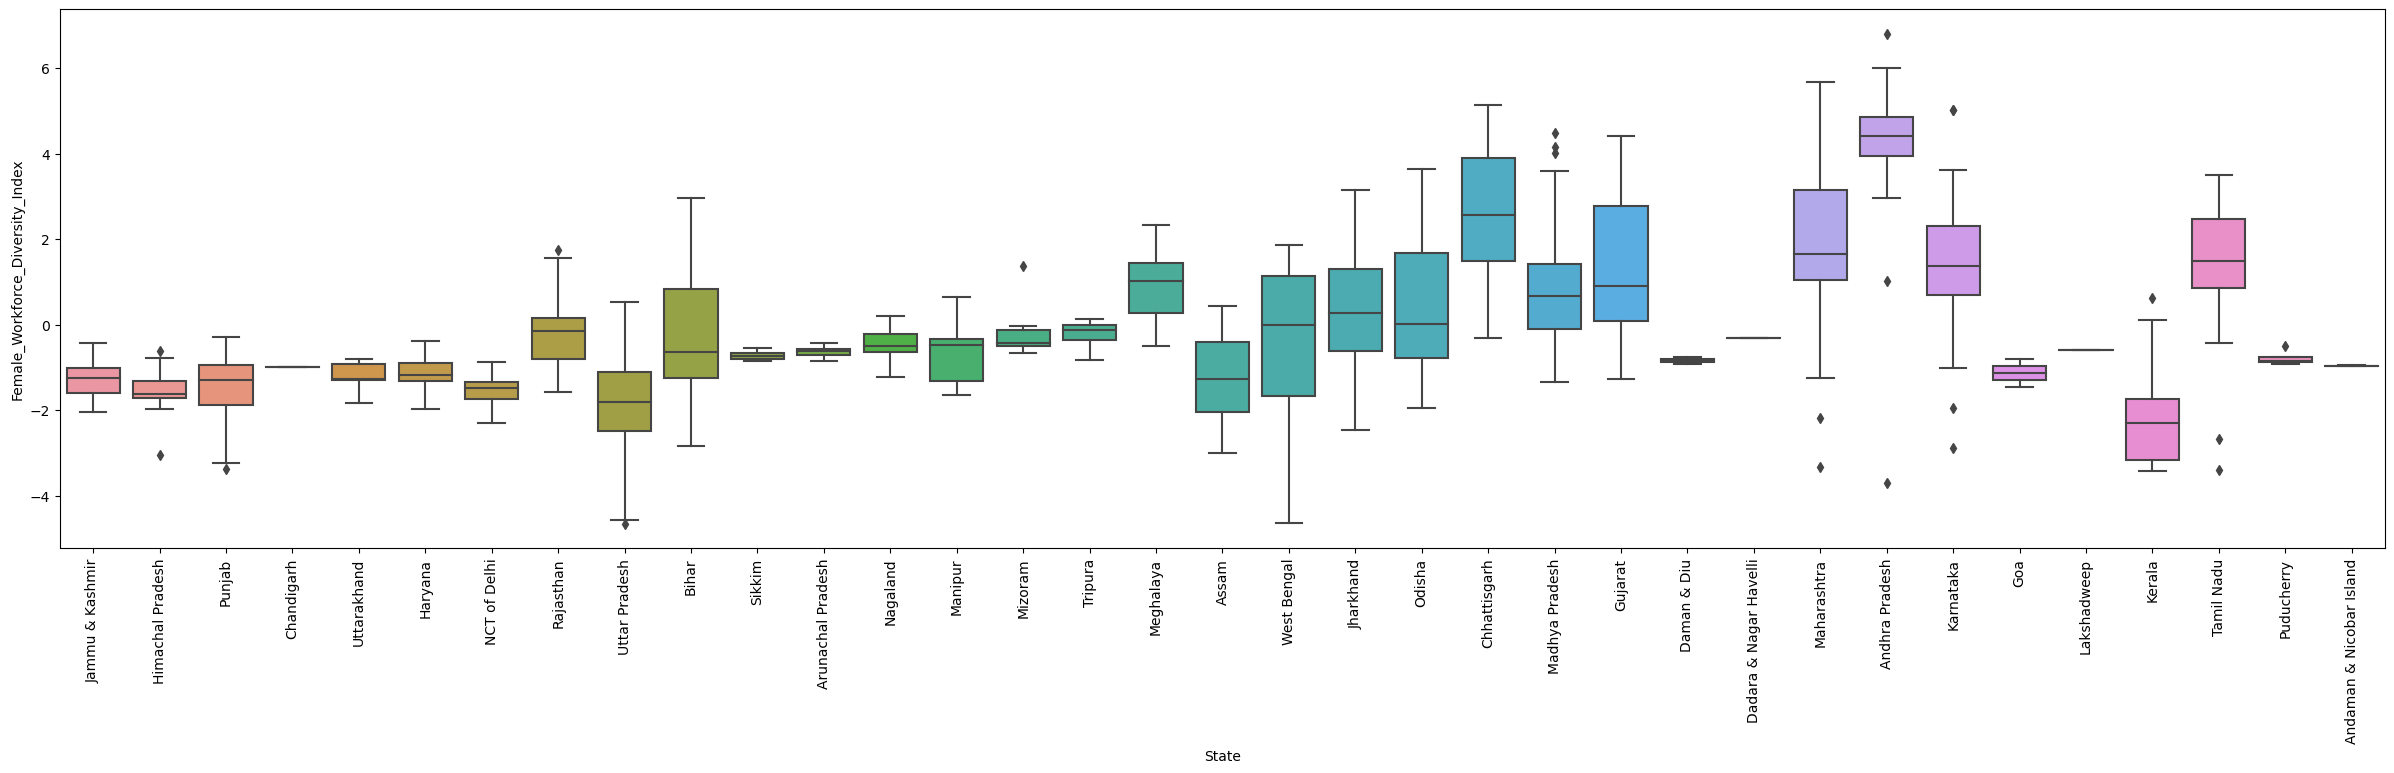

In [123]:
fig,ax = plt.subplots(figsize=(30,7))
sns.boxplot(x='State',y='Female_Workforce_Diversity_Index', data=df_new)
plt.xticks(rotation=90)
plt.show()

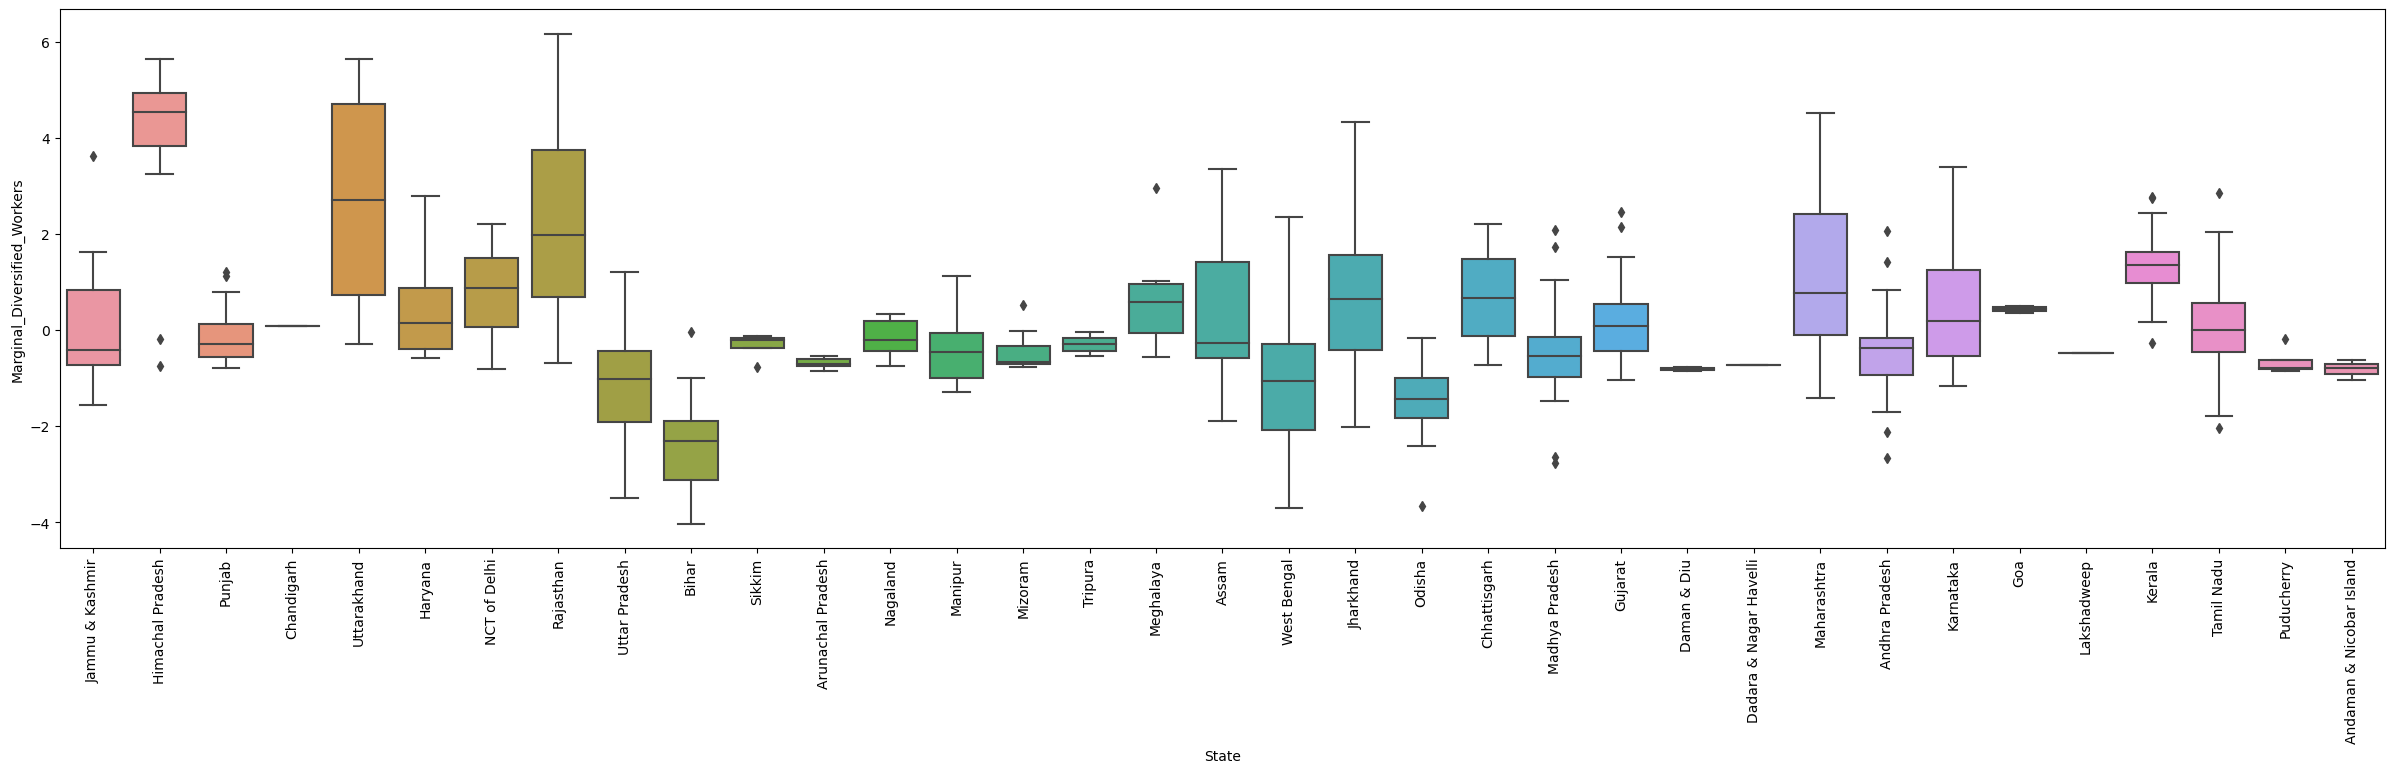

In [136]:
fig,ax = plt.subplots(figsize=(30,7))
sns.boxplot(x='State',y='Marginal_Diversified_Workers', data=df_new)
plt.xticks(rotation=90)
plt.show()

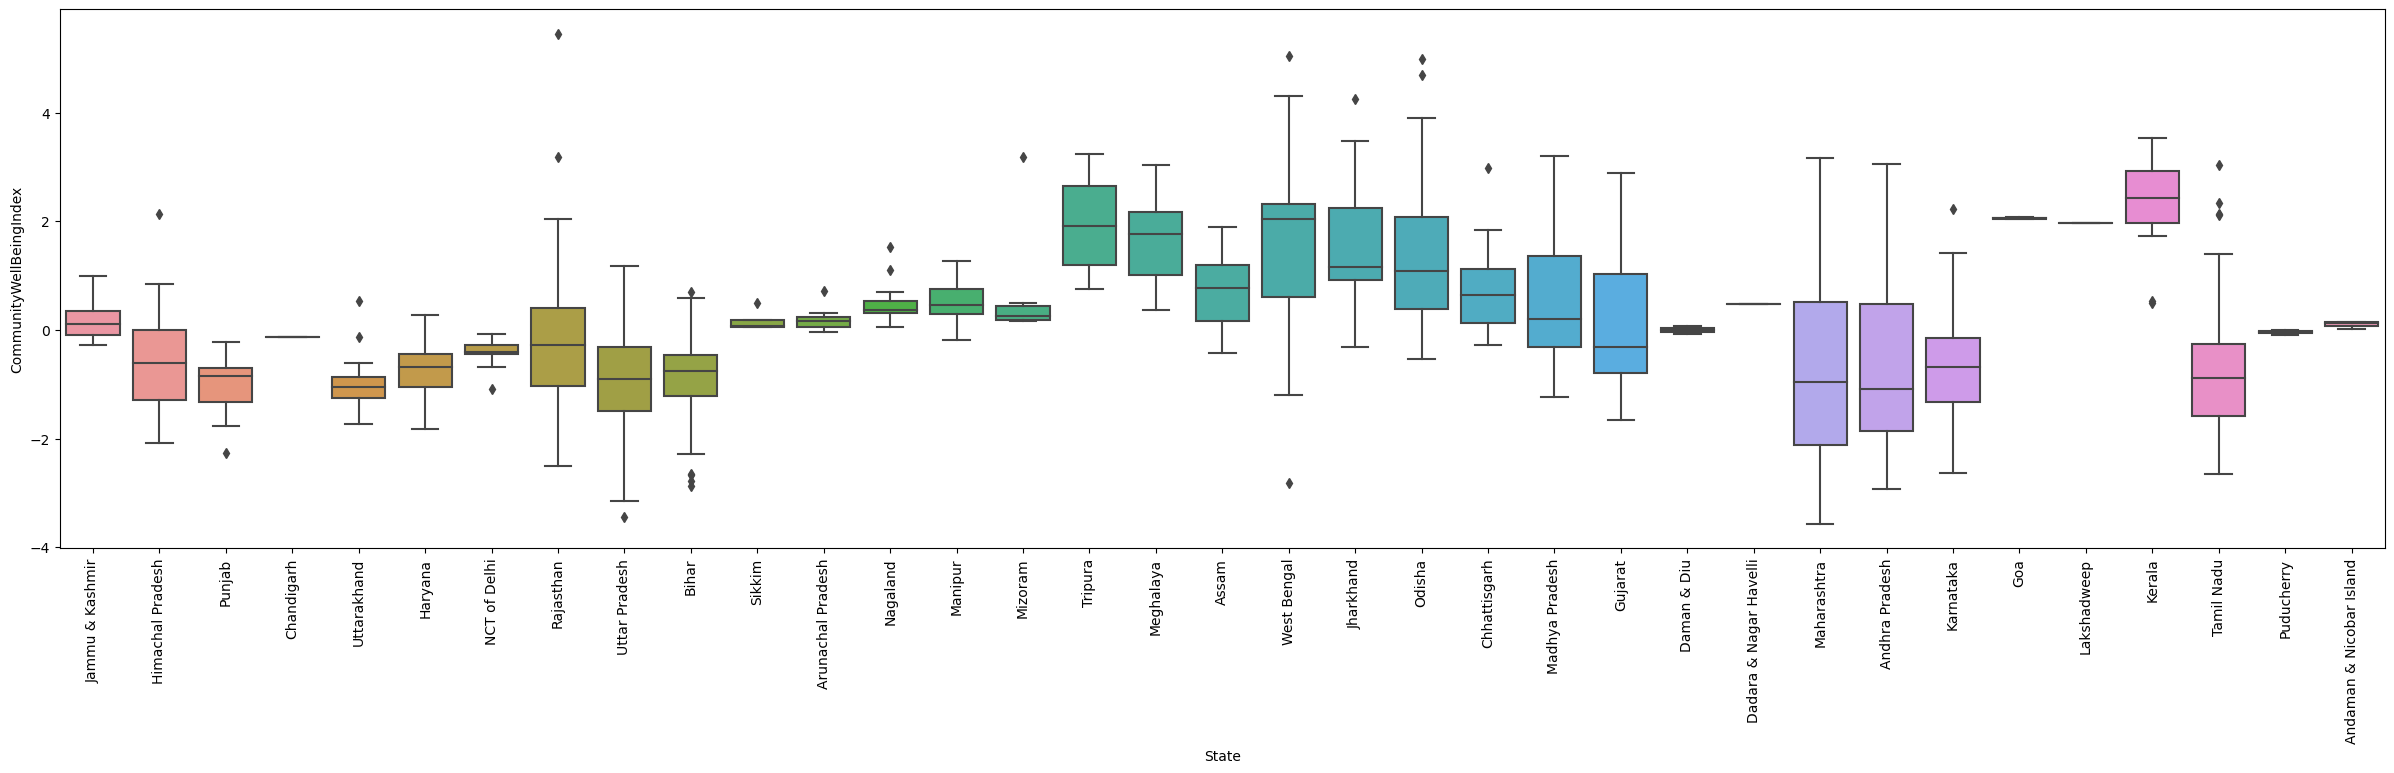

In [164]:
fig,ax = plt.subplots(figsize=(30,7))
sns.boxplot(x='State',y='CommunityWellBeingIndex', data=df_new)
plt.xticks(rotation=90)
plt.show()